# Data Analysis Project: Comparing Stocks and Cryptocurrencies  

## Overview  
This project aims to analyse and compare the performance of traditional stock prices and cryptocurrencies by leveraging datasets extracted from **Yahoo Finance**. The primary objective is to explore how these two asset classes differ in terms of **trends, volatility, trading volumes**, and **cumulative performance**, providing insights for financial analysis.  

The analysis is structured into the following five key steps:  
1. **Crawling a Real-World Dataset**  
   - Extract stock and cryptocurrency price data directly from Yahoo Finance using the `yfinance` library, fulfilling the requirement to use external APIs.  
   - Ensure the dataset contains at least 5 columns and 150 rows.  

2. **Performing Data Preparation and Cleaning**  
   - Handle missing data and inconsistencies in the extracted datasets.  
   - Transform variables where necessary (e.g., log-transform for scaling).  
   - Merge stock and cryptocurrency data to create a unified dataset for analysis.  

3. **Exploratory Analysis**  
   - Use visualisations (e.g., time-series plots, density plots, boxplots) to summarise key metrics such as returns, volatility, and trading volumes.  
   - Highlight patterns and differences between the two asset classes.  

4. **Formulating and Answering a Question**  
   - Investigate a key question: *How does cryptocurrency performance compare to traditional stocks over time?*  
   - Leverage the prepared dataset and visual analytics to answer this question, supported by statistical insights.  

5. **Summary and Conclusion**  
   - Summarise the findings of the analysis, including key differences between stocks and cryptocurrencies.  
   - Suggest potential areas for further research, such as analysing additional variables or exploring different time periods.  



## Step 1: Crawling Real-World Datasets  

### Objective  
Extract two datasets—one for traditional stock prices and another for cryptocurrency prices. These datasets will serve as the foundation for analysing and comparing the performance of cryptocurrencies to traditional stocks.  

### Reason for Choosing Stock and Cryptocurrency Data  
- **Stock Price Data**:  
  - Companies like Apple (AAPL) and Tesla (TSLA) represent traditional market trends and are widely recognised benchmarks in financial analysis.  
  - Stock data is well-structured and offers insights into the performance of established markets.  
- **Cryptocurrency Price Data**:  
  - Cryptocurrencies like Bitcoin (BTC-USD) and Ethereum (ETH-USD) represent a growing alternative asset class with distinct market behaviours such as higher volatility and decentralised trading.  
  - Including cryptocurrencies provides a comparative view against traditional assets, aligning with financial data exploration.  

By combining stock and cryptocurrency datasets, we aim to uncover key differences in **volatility, trends**, and **performance**, which is valuable for financial decision-making.  

### Data Sources  
- **Stock Prices**: Extracted from Yahoo Finance using the `yfinance` library, which supports querying historical stock data.  
- **Cryptocurrency Prices**: Extracted from Yahoo Finance using the `yfinance` library, as it supports cryptocurrency tickers like `BTC-USD` (Bitcoin) and `ETH-USD` (Ethereum).  

### Plan for This Step  
1. Use the `yfinance` library to fetch historical stock price data for selected companies (e.g., Apple and Tesla).  
2. Use the same library to extract cryptocurrency price data for Bitcoin and Ethereum.  
3. Save the extracted datasets as CSV files to ensure reproducibility and ease of access for subsequent analysis steps.  


### Step 1.1: Downloading Necessary Libraries  

- **Objective**:  
  Install and verify the required Python libraries to ensure they are functional for crawling, analysing, and visualising data.  

- **Plan**:  
  1. Use `pip` to install the following libraries:  
     - `yfinance`: For fetching stock and cryptocurrency price data.  
     - `pandas`: For data manipulation and cleaning.  
     - `matplotlib`: For data visualisation in later steps.  
     - `seaborn`: For advanced visualisations such as KDE plots.  
     - `numpy`: For mathematical operations and numerical transformations.  
  2. Import the libraries to verify that they are installed successfully.  
  3. Print a confirmation message to ensure all libraries are functional and ready for use.  

The provided code block installs these libraries (if not already installed), verifies the imports, and prints a success message. This step ensures the environment is prepared for subsequent analysis.  



In [75]:
# Install required libraries (if running in a Jupyter Notebook environment)
!pip install yfinance pandas matplotlib seaborn numpy

# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verify the libraries are installed and functional
print("Libraries installed and imported successfully.")



Libraries installed and imported successfully.


### Step 1.2: Fetching Stock Price Data  

- **Objective**:  
  Retrieve historical stock price data for three selected companies (Apple, Tesla, and Amazon) to use in the comparative analysis.  

- **Plan**:  
  1. **Define Parameters**:  
     - Specify the stock tickers: `AAPL` (Apple), `TSLA` (Tesla), and `AMZN` (Amazon).  
     - Set the time range for data extraction: From January 1, 2020, to January 1, 2023.  
  2. **Data Extraction**:  
     - Use the `yfinance` library to fetch the stock data for the specified tickers and date range.  
     - Extract key variables for each stock, including:  
       - `Date`: The trading date.  
       - `Close`: The stock's closing price.  
       - `Volume`: The number of shares traded.  
       - `High`/`Low`: Daily high and low prices.  
       - `Adj Close`: Adjusted closing price accounting for dividends or splits.  
  3. **Save Data**:  
     - Save the fetched data for each stock as a separate CSV file using a structured naming convention (`{ticker}_stock_data.csv`).  
     - Print a confirmation message for each saved file to ensure data is stored successfully.  

This step ensures that reliable and structured stock price data is ready for subsequent data preparation and analysis. The provided code automates the process of fetching and saving the data.




In [16]:

# Define stock tickers and date range
stock_tickers = ["AAPL", "TSLA", "AMZN"]  # Selected stocks
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch and save the stock data
for ticker in stock_tickers:
    # Download data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    # Save data to CSV
    filename = f"{ticker}_stock_data.csv"
    stock_data.to_csv(filename)
    print(f"Saved data for {ticker} to {filename}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Saved data for AAPL to AAPL_stock_data.csv
Saved data for TSLA to TSLA_stock_data.csv
Saved data for AMZN to AMZN_stock_data.csv


### Step 1.3: Fetching Cryptocurrency Data  

- **Objective**:  
  Retrieve historical price data for two leading cryptocurrencies (Bitcoin and Ethereum) to compare their performance against traditional stocks.  

- **Plan**:  
  1. **Define Parameters**:  
     - Specify the cryptocurrency tickers: `BTC-USD` (Bitcoin) and `ETH-USD` (Ethereum).  
     - Set the same time range as used for stocks: January 1, 2020, to January 1, 2023.  
  2. **Data Extraction**:  
     - Use the `yfinance` library to fetch the price data for the selected cryptocurrencies within the defined time range.  
     - Extract key variables for each cryptocurrency, including:  
       - `Date`: The trading date.  
       - `Close`: The cryptocurrency's closing price.  
       - `Volume`: The number of units traded.  
       - `High`/`Low`: Daily high and low prices.  
       - `Adj Close`: Adjusted closing price, accounting for any corrections.  
  3. **Save Data**:  
     - Save the retrieved data for each cryptocurrency as separate CSV files using a structured naming convention (`{ticker}_crypto_data.csv`).  
     - Print a confirmation message for each saved file to ensure successful storage.  

This step ensures that historical cryptocurrency price data is systematically collected and stored, making it ready for further analysis and comparison with stock data.



In [17]:
# Define cryptocurrency tickers and date range
crypto_tickers = ["BTC-USD", "ETH-USD"]  # Selected cryptocurrencies
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch and save the cryptocurrency data
for ticker in crypto_tickers:
    # Download data from Yahoo Finance
    crypto_data = yf.download(ticker, start=start_date, end=end_date)
    # Save data to CSV
    filename = f"{ticker}_crypto_data.csv"
    crypto_data.to_csv(filename)
    print(f"Saved data for {ticker} to {filename}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Saved data for BTC-USD to BTC-USD_crypto_data.csv
Saved data for ETH-USD to ETH-USD_crypto_data.csv


### Step 1.4: Merging Stock and Cryptocurrency Datasets  

- **Objective**:  
  Combine datasets for the selected stocks (Apple, Tesla, Amazon) and cryptocurrencies (Bitcoin, Ethereum) into a single unified dataset for comparative analysis.  

- **Plan**:  
  1. **Load Individual Datasets**:  
     - Import the data for each stock and cryptocurrency from their respective CSV files.  
     - Extract key columns for analysis, including:  
       - `Date` (trading date).  
       - `Close` (closing price).  
       - `High`/`Low` (daily high and low prices).  
       - `Volume` (traded volume).  
       - `Adj Close` (adjusted closing price).  
  2. **Standardise Column Names**:  
     - Use the ticker name (e.g., `AAPL`, `BTC-USD`) to rename columns, ensuring clarity and preventing overlap (e.g., `AAPL_Close`, `BTC-USD_Volume`).  
  3. **Merge on Date**:  
     - Perform an inner join on the `Date` column to ensure alignment of data across assets.  
  4. **Save the Merged Dataset**:  
     - Export the combined dataset to a new CSV file (`merged_stock_crypto_data_reduced.csv`) for further analysis.  

This step consolidates all the data into a structured format, enabling streamlined exploratory analysis and comparison of stocks and cryptocurrencies.



In [18]:
# List of file names for 3 selected stocks and 2 cryptocurrencies
file_names = [
    "AAPL_stock_data.csv", "TSLA_stock_data.csv", "AMZN_stock_data.csv",
    "BTC-USD_crypto_data.csv", "ETH-USD_crypto_data.csv"
]

# Load the data, extract relevant columns, and process headers
data_frames = []
for file_name in file_names:
    # Load the full file to extract the ticker (second row)
    full_df = pd.read_csv(file_name, header=0)
    # Extract the ticker from the second row
    ticker = full_df.iloc[0]["Close"]
    # Load data, skip rows 2 and 3, and use the first row as header
    df = pd.read_csv(file_name, header=0, skiprows=[1, 2])
    # Rename 'Price' to 'Date'
    df.rename(columns={"Price": "Date"}, inplace=True)
    # Rename columns to include the ticker name for clarity
    df.rename(
        columns={
            "Close": f"{ticker}_Close",
            "Volume": f"{ticker}_Volume",
            "High": f"{ticker}_High",
            "Low": f"{ticker}_Low",
            "Adj Close": f"{ticker}_Adj_Close"
        },
        inplace=True,
    )
    # Keep only the relevant columns
    df = df[["Date", f"{ticker}_Close", f"{ticker}_Volume", f"{ticker}_High", f"{ticker}_Low", f"{ticker}_Adj_Close"]]
    data_frames.append(df)

# Merge all datasets on the 'Date' column
merged_data = data_frames[0]
for df in data_frames[1:]:
    merged_data = pd.merge(merged_data, df, on="Date", how="inner")

# Save the merged dataset to a new CSV file
merged_data.to_csv("merged_stock_crypto_data_reduced.csv", index=False)
print("Merged dataset saved as 'merged_stock_crypto_data_reduced.csv'")

Merged dataset saved as 'merged_stock_crypto_data_reduced.csv'


## Step 2: Data Preparation and Cleaning  

- **Objective**:  
  Ensure the merged dataset is clean, consistent, and enriched with additional features to support meaningful analysis.  

- **Plan for This Step**:  
  1. **Load Dataset**:  
     - Import the merged dataset into a Pandas DataFrame for processing.  
  2. **Handle Missing Data**:  
     - Identify any missing values or gaps in the dataset.  
     - Apply suitable techniques (e.g., interpolation or forward-fill) to address these gaps.  
  3. **Address Outliers and Inconsistencies**:  
     - Detect extreme outliers or inconsistencies in variables such as prices or volumes.  
     - Apply appropriate transformations or filtering techniques to ensure data accuracy.  
  4. **Feature Engineering**:  
     - Parse and convert the `Date` column to a datetime format for time-series analysis.  
     - Create new features to enrich the dataset, such as:  
       - **Daily Returns**: Percentage change in closing prices.  
       - **Volatility**: Rolling standard deviation of daily returns.  

Each of these tasks will be executed systematically, with detailed explanations and justifications provided in the following subsections.


### Step 2.1: Load the Dataset

- **Objective**:  
  Load the merged dataset into a Pandas DataFrame and verify its contents to ensure it is ready for cleaning and preparation.

- **Steps**:  
  1. Use the Pandas `read_csv` function to load the dataset (`merged_stock_crypto_data_reduced.csv`) into a DataFrame.  
  2. Verify the dataset by:  
     - Displaying the first few rows (`head()` function) to understand the structure and initial values.  
     - Printing the column names to confirm that all necessary variables are included.  
     - Checking the shape of the dataset (number of rows and columns) to ensure it meets the requirements.  
     - Confirming data integrity by reviewing the initial sample for anomalies or missing data.  

This initial step ensures the dataset is correctly imported and provides a clear understanding of its structure before moving to the cleaning phase.


In [19]:
# Load the dataset
df = pd.read_csv("merged_stock_crypto_data_reduced.csv")

# Verify the dataset
print("First few rows of the dataset:")
print(df.head())  # Display the first few rows

print("\nColumn names in the dataset:")
print(df.columns)  # Display column names

print("\nShape of the dataset:")
print(df.shape)  # Display the number of rows and columns

First few rows of the dataset:
         Date  AAPL_Close  AAPL_Volume  AAPL_High   AAPL_Low  AAPL_Adj_Close  \
0  2020-01-02   75.087502    135480400  75.150002  73.797501       72.796021   
1  2020-01-03   74.357498    146322800  75.144997  74.125000       72.088287   
2  2020-01-06   74.949997    118387200  74.989998  73.187500       72.662720   
3  2020-01-07   74.597504    108872000  75.224998  74.370003       72.320961   
4  2020-01-08   75.797501    132079200  76.110001  74.290001       73.484352   

   TSLA_Close  TSLA_Volume  TSLA_High   TSLA_Low  ...  BTC-USD_Close  \
0   28.684000    142981500  28.713333  28.114000  ...    6985.470215   
1   29.534000    266677500  30.266666  29.128000  ...    7344.884277   
2   30.102667    151995000  30.104000  29.333332  ...    7769.219238   
3   31.270666    268231500  31.441999  30.224001  ...    8163.692383   
4   32.809334    467164500  33.232666  31.215334  ...    8079.862793   

   BTC-USD_Volume  BTC-USD_High  BTC-USD_Low  BTC-USD_A

### Step 2.2: Handle Missing Data

- **Objective**:  
  Ensure the dataset is complete and free of gaps by identifying and addressing missing values.

- **Steps**:  
  1. **Identify Missing Values**:  
     - Use the `isnull()` method combined with `sum()` to calculate the total number of missing values for each column in the dataset.  
     - Display the results to understand the extent of missing data.  

  2. **Handle Missing Values**:  
     - Use linear interpolation (`interpolate(method='linear')`) to fill missing values.  
     - This method ensures that gaps are filled based on trends in the data, maintaining continuity.  

  3. **Verify Changes**:  
     - Recheck the dataset for missing values after handling them to confirm that the dataset is now complete.  
     - Print the results to validate that no missing data remains.  

By addressing missing values, the dataset becomes reliable and ready for further analysis.


In [20]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Handle missing values using linear interpolation
df.interpolate(method="linear", inplace=True)

# Verify that missing values have been handled
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)


Missing values before handling:
 Date                 0
AAPL_Close           0
AAPL_Volume          0
AAPL_High            0
AAPL_Low             0
AAPL_Adj_Close       0
TSLA_Close           0
TSLA_Volume          0
TSLA_High            0
TSLA_Low             0
TSLA_Adj_Close       0
AMZN_Close           0
AMZN_Volume          0
AMZN_High            0
AMZN_Low             0
AMZN_Adj_Close       0
BTC-USD_Close        0
BTC-USD_Volume       0
BTC-USD_High         0
BTC-USD_Low          0
BTC-USD_Adj_Close    0
ETH-USD_Close        0
ETH-USD_Volume       0
ETH-USD_High         0
ETH-USD_Low          0
ETH-USD_Adj_Close    0
dtype: int64

Missing values after handling:
 Date                 0
AAPL_Close           0
AAPL_Volume          0
AAPL_High            0
AAPL_Low             0
AAPL_Adj_Close       0
TSLA_Close           0
TSLA_Volume          0
TSLA_High            0
TSLA_Low             0
TSLA_Adj_Close       0
AMZN_Close           0
AMZN_Volume          0
AMZN_High            0
A

### Step 2.3: Handle Outliers

- **Objective**:  
  Ensure the dataset is free from extreme values that could skew the results by identifying and removing outliers in relevant columns.

- **Steps**:  
  1. **Define Outliers**:  
     - Use the Interquartile Range (IQR) method to detect outliers.  
     - Calculate the first quartile (Q1), third quartile (Q3), and the IQR (`Q3 - Q1`).  
     - Define outliers as values that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.  

  2. **Identify Relevant Columns**:  
     - Focus on the `Volume` columns for all assets (`AAPL_Volume`, `BTC-USD_Volume`, etc.), as trading volume is susceptible to extreme fluctuations.  
     - Justification: Volume data often contains spikes due to irregular trading patterns or one-time events, which can distort trends.  

  3. **Remove Outliers**:  
     - Apply the IQR method to each `Volume` column and filter out rows with values outside the defined bounds.  
     - Print the number of rows removed for each column to track the impact of outlier removal.  

  4. **Verify Dataset Update**:  
     - Check the shape of the dataset after handling outliers to ensure the changes were applied successfully.  
     - Confirm that the dataset is now refined and ready for further analysis.  

By using the IQR method, extreme values are handled systematically without affecting the overall integrity of the dataset.



In [21]:
# Define a function to remove outliers using the IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to 'Volume' columns
for col in df.columns:
    if "Volume" in col:
        print(f"Handling outliers for {col}...")
        initial_shape = df.shape
        df = remove_outliers(df, col)
        print(f"Rows removed for {col}: {initial_shape[0] - df.shape[0]}")

# Verify the updated dataset
print("\nShape of the dataset after handling outliers:", df.shape)


Handling outliers for AAPL_Volume...
Rows removed for AAPL_Volume: 41
Handling outliers for TSLA_Volume...
Rows removed for TSLA_Volume: 56
Handling outliers for AMZN_Volume...
Rows removed for AMZN_Volume: 25
Handling outliers for BTC-USD_Volume...
Rows removed for BTC-USD_Volume: 32
Handling outliers for ETH-USD_Volume...
Rows removed for ETH-USD_Volume: 32

Shape of the dataset after handling outliers: (570, 26)


### Step 2.4: Enrich the Data

- **Objective**:  
  Enhance the dataset by parsing the `Date` column and creating additional features for deeper analysis of asset performance.

- **Steps**:  
  1. **Parse the `Date` Column**:  
     - Convert the `Date` column to a proper datetime format using Pandas.  
     - Justification: Ensures compatibility with time-series analysis and facilitates date-based operations like filtering and plotting.  

  2. **Create New Features**:  
     - **Daily Returns**:  
       - Calculate the percentage change in `Close` prices for each asset to measure daily performance.  
       - Formula: `(Current Close - Previous Close) / Previous Close`.  
       - Significance: Helps analyse trends and compare the daily performance of stocks and cryptocurrencies.  
     - **Volatility**:  
       - Compute the difference between `High` and `Low` prices for each asset to capture daily price fluctuations.  
       - Formula: `High - Low`.  
       - Significance: Provides insights into market risk and highlights periods of heightened price movement.  

  3. **Verify the Features**:  
     - Check for the presence of the new columns (`Daily_Return` and `Volatility`) in the dataset.  
     - Display the first few rows to confirm that the new features were added correctly.  

By parsing the `Date` column and adding these features, the dataset is enriched for a more comprehensive analysis of performance and volatility.



In [24]:
# Parse the 'Date' column into datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create daily returns for each asset
for col in df.columns:
    if "Close" in col:
        df[f"{col}_Daily_Return"] = df[col].pct_change()  # Percentage change

# Create volatility for each asset
for col in df.columns:
    if "High" in col:
        asset_name = col.split("_")[0]  # Extract asset name (e.g., "AAPL" or "BTC-USD")
        df[f"{asset_name}_Volatility"] = df[f"{asset_name}_High"] - df[f"{asset_name}_Low"]

# Verify the newly created columns
print("Newly created columns:")
print([col for col in df.columns if "Daily_Return" in col or "Volatility" in col])

# Display the first few rows to confirm the new features
print("\nFirst few rows with new features:")
print(df.head())


Newly created columns:
['AAPL_Close_Daily_Return', 'AAPL_Adj_Close_Daily_Return', 'TSLA_Close_Daily_Return', 'TSLA_Adj_Close_Daily_Return', 'AMZN_Close_Daily_Return', 'AMZN_Adj_Close_Daily_Return', 'BTC-USD_Close_Daily_Return', 'BTC-USD_Adj_Close_Daily_Return', 'ETH-USD_Close_Daily_Return', 'ETH-USD_Adj_Close_Daily_Return', 'AAPL_Volatility', 'TSLA_Volatility', 'AMZN_Volatility', 'BTC-USD_Volatility', 'ETH-USD_Volatility']

First few rows with new features:
         Date  AAPL_Close  AAPL_Volume  AAPL_High   AAPL_Low  AAPL_Adj_Close  \
0  2020-01-02   75.087502    135480400  75.150002  73.797501       72.796021   
2  2020-01-06   74.949997    118387200  74.989998  73.187500       72.662720   
6  2020-01-10   77.582497    140644800  78.167503  77.062500       75.214874   
11 2020-01-17   79.682503    137816400  79.684998  78.750000       77.250809   
15 2020-01-24   79.577499    146537600  80.832497  79.379997       77.148987   

    TSLA_Close  TSLA_Volume  TSLA_High   TSLA_Low  ...  \

### Step 2.5: Finalising the Cleaned Dataset

- **Objective**:  
  Prepare a final cleaned and enriched dataset containing only the necessary columns for analysis, ensuring it is ready for the next steps.

- **Steps**:  
  1. **Select Essential Columns**:  
     - Identify columns critical for analysis, including:  
       - `Date`: Key for time-series analysis.  
       - `Adj Close`: Adjusted closing price for assessing performance.  
       - `Volume`: Trading activity metric.  
       - `Volatility`: Measure of price fluctuations.  
       - `Adj_Close_Daily_Return`: Metric for daily percentage change in performance.  
     - Justification: Retaining only these columns ensures focus on relevant variables, reduces dataset size, and improves processing efficiency.  

  2. **Filter the Dataset**:  
     - Use the selected columns to filter the DataFrame and exclude unnecessary data.  

  3. **Save the Cleaned Dataset**:  
     - Export the cleaned dataset as a new CSV file named `final_cleaned_enriched_data.csv`.  

  4. **Verify Changes**:  
     - Print the dataset's shape to confirm the reduced size.  
     - Display the column names to validate inclusion of only the essential variables.  

- **Expected Outcome**:  
  A final dataset saved as `final_cleaned_enriched_data.csv`, containing only the required columns for efficient exploratory analysis and statistical computations.



In [25]:
# Define the essential columns to keep
columns_to_keep = ["Date"]  # Always keep the Date column

# Add relevant columns for each asset
for col in df.columns:
    if "Adj_Close" in col or "Volume" in col or "Volatility" in col or "Adj_Close_Daily_Return" in col:
        columns_to_keep.append(col)

# Filter the DataFrame to keep only the selected columns
df_cleaned = df[columns_to_keep]

# Save the cleaned and simplified dataset to a new CSV file
df_cleaned.to_csv("final_cleaned_enriched_data.csv", index=False)

# Confirm the changes
print("Final dataset saved as 'final_cleaned_enriched_data.csv'")
print("Shape of the final dataset:", df_cleaned.shape)
print("Columns in the final dataset:")
print(df_cleaned.columns)


Final dataset saved as 'final_cleaned_enriched_data.csv'
Shape of the final dataset: (570, 21)
Columns in the final dataset:
Index(['Date', 'AAPL_Volume', 'AAPL_Adj_Close', 'TSLA_Volume',
       'TSLA_Adj_Close', 'AMZN_Volume', 'AMZN_Adj_Close', 'BTC-USD_Volume',
       'BTC-USD_Adj_Close', 'ETH-USD_Volume', 'ETH-USD_Adj_Close',
       'AAPL_Adj_Close_Daily_Return', 'TSLA_Adj_Close_Daily_Return',
       'AMZN_Adj_Close_Daily_Return', 'BTC-USD_Adj_Close_Daily_Return',
       'ETH-USD_Adj_Close_Daily_Return', 'AAPL_Volatility', 'TSLA_Volatility',
       'AMZN_Volatility', 'BTC-USD_Volatility', 'ETH-USD_Volatility'],
      dtype='object')


### Step 2.6: Grouping Data for Stocks and Cryptocurrencies

- **Objective**:  
  Group the assets into two categories—**Traditional Stocks** and **Cryptocurrencies**—to simplify analysis and focus on broader trends and differences between these two asset classes.

- **Grouping Logic**:  
  - **Traditional Stocks**:
    - Includes `AAPL` (Apple), `TSLA` (Tesla), and `AMZN` (Amazon).
  - **Cryptocurrencies**:
    - Includes `BTC-USD` (Bitcoin) and `ETH-USD` (Ethereum).

- **Metrics for Grouping**:  
  For each group, the following metrics will be aggregated:
  1. **Average Daily Returns** (`Adj_Close_Daily_Return`): To assess performance.
  2. **Average Volatility** (`Volatility`): To measure risk and price fluctuations.
  3. **Total Trading Volume** (`Volume`): To analyse trading activity.

- **Purpose of Grouping**:  
  Aggregating metrics by category allows for:
  1. Easier comparison of stocks vs. cryptocurrencies.
  2. Highlighting trends and insights that are consistent within each group.
  3. Simplifying the analysis without losing meaningful information.

- **Steps**:  
  1. Define asset groups for traditional stocks and cryptocurrencies.  
  2. Calculate aggregate metrics for each group: average daily returns, average volatility, and total trading volume.  
  3. Create a new DataFrame that summarises these metrics for each category.  
  4. Save the grouped dataset to a new CSV file (`grouped_data.csv`) for further analysis.

- **Expected Outcome**:  
  A grouped dataset that provides an aggregated view of key metrics for stocks and cryptocurrencies, making subsequent analysis and visualisation more streamlined.



In [27]:
# Load the cleaned and enriched dataset
df = pd.read_csv("reordered_cleaned_data.csv")  # Replace with the correct file name if different

# Define asset groups
stocks = ["AAPL", "TSLA", "AMZN"]
cryptos = ["BTC-USD", "ETH-USD"]

# Create DataFrames for grouped metrics
grouped_metrics = {"Traditional Stocks": {}, "Cryptocurrencies": {}}

for group, assets in [("Traditional Stocks", stocks), ("Cryptocurrencies", cryptos)]:
    # Aggregate metrics
    grouped_metrics[group]["Avg_Return"] = df[[f"{asset}_Adj_Close_Daily_Return" for asset in assets]].mean(axis=1)
    grouped_metrics[group]["Avg_Volatility"] = df[[f"{asset}_Volatility" for asset in assets]].mean(axis=1)
    grouped_metrics[group]["Total_Volume"] = df[[f"{asset}_Volume" for asset in assets]].sum(axis=1)

# Convert to a grouped DataFrame for analysis
grouped_df = pd.DataFrame({
    "Date": df["Date"],
    "Stocks_Avg_Return": grouped_metrics["Traditional Stocks"]["Avg_Return"],
    "Cryptos_Avg_Return": grouped_metrics["Cryptocurrencies"]["Avg_Return"],
    "Stocks_Avg_Volatility": grouped_metrics["Traditional Stocks"]["Avg_Volatility"],
    "Cryptos_Avg_Volatility": grouped_metrics["Cryptocurrencies"]["Avg_Volatility"],
    "Stocks_Total_Volume": grouped_metrics["Traditional Stocks"]["Total_Volume"],
    "Cryptos_Total_Volume": grouped_metrics["Cryptocurrencies"]["Total_Volume"]
})

# Preview the grouped DataFrame
print("Grouped Data Preview:")
print(grouped_df.head())

# Save grouped data for further analysis
grouped_df.to_csv("grouped_data.csv", index=False)
print("Grouped dataset saved as 'grouped_data.csv'")


Grouped Data Preview:
         Date  Stocks_Avg_Return  Cryptos_Avg_Return  Stocks_Avg_Volatility  \
0  2020-01-02                NaN                 NaN               1.214945   
1  2020-01-06           0.016731            0.122396               1.585889   
2  2020-01-10           0.027897            0.024392               1.067113   
3  2020-01-17           0.028311            0.139818               1.079498   
4  2020-01-24           0.034479           -0.049708               1.712219   

   Cryptos_Avg_Volatility  Stocks_Total_Volume  Cryptos_Total_Volume  
0              140.375191            359041900           28834792721  
1              190.411385            351618200           32370008719  
2              224.213112            392111300           37799400047  
3              145.549637            422198900           51369231146  
4              127.692940            437165600           35055584188  
Grouped dataset saved as 'grouped_data.csv'


### Step 2.7: Handling Missing Values in Daily Returns

- **Objective**:  
  Address the `NaN` values present in the daily return columns caused by the lack of previous data points for the first row.

- **Reason for This Step**:  
  The first row of `Avg_Return` columns (e.g., `Stocks_Avg_Return`, `Cryptos_Avg_Return`) contains `NaN` because no previous data exists to calculate the percentage change. Handling these values ensures accurate and consistent analysis without introducing errors.

- **Approach**:  
  1. **Identify Missing Values**: Check for missing values in the grouped dataset to locate gaps in the data.  
  2. **Remove Rows with `NaN`**: Drop the first row, as it contains missing values in daily return columns due to the absence of previous data points for percentage change calculations.  
  3. **Verify Updates**: Recheck the dataset to confirm that no missing values remain.  
  4. **Save the Cleaned Dataset**: Export the updated dataset as a new CSV file (`cleaned_grouped_data.csv`) for use in further analysis.

- **Code Execution**:  
  - Identify missing values before handling.  
  - Remove rows with missing values using the `dropna()` method.  
  - Verify that missing values have been handled by printing a summary.  
  - Save the cleaned dataset to ensure it is ready for the next steps.

- **Expected Outcome**:  
  A cleaned grouped dataset with no missing values, ensuring consistent and accurate analysis in subsequent steps.



In [28]:
# Check for missing values in the grouped dataset
print("Missing values before handling:")
print(grouped_df.isna().sum())

# Drop the first row with NaN values in daily returns
grouped_df = grouped_df.dropna()

# Verify the updated dataset
print("Missing values after handling:")
print(grouped_df.isna().sum())

# Save the cleaned grouped dataset
grouped_df.to_csv("cleaned_grouped_data.csv", index=False)
print("Cleaned grouped dataset saved as 'cleaned_grouped_data.csv'")


Missing values before handling:
Date                      0
Stocks_Avg_Return         1
Cryptos_Avg_Return        1
Stocks_Avg_Volatility     0
Cryptos_Avg_Volatility    0
Stocks_Total_Volume       0
Cryptos_Total_Volume      0
dtype: int64
Missing values after handling:
Date                      0
Stocks_Avg_Return         0
Cryptos_Avg_Return        0
Stocks_Avg_Volatility     0
Cryptos_Avg_Volatility    0
Stocks_Total_Volume       0
Cryptos_Total_Volume      0
dtype: int64
Cleaned grouped dataset saved as 'cleaned_grouped_data.csv'


## Step 3: Exploratory Analysis

This section explores key metrics of the dataset, focusing on summarising and visualising data to uncover patterns, trends, and relationships. The insights gained here will guide deeper analysis in subsequent steps.

### Overview
- **Objective**:  
  Gain insights into the dataset by summarising and visualising key metrics for stocks and cryptocurrencies. This step helps identify patterns, trends, and relationships within the data to inform deeper analysis.

- **Plan**:  
  1. Compute summary statistics for key metrics, including:
     - **Average Returns** (`Stocks_Avg_Return` and `Cryptos_Avg_Return`): To compare performance.  
     - **Average Volatility** (`Stocks_Avg_Volatility` and `Cryptos_Avg_Volatility`): To assess risk levels.  
     - **Total Trading Volume** (`Stocks_Total_Volume` and `Cryptos_Total_Volume`): To analyse trading activity.  
  2. Visualise the distribution of returns and volatility using density plots to compare risk and performance between stocks and cryptocurrencies.  
  3. Use scatter plots to explore relationships between metrics, such as:  
     - **Returns vs. Volatility**: To assess the risk-return trade-off.  
     - **Trading Volume vs. Returns**: To explore the relationship between trading activity and performance.  
  4. Create time-series plots to examine trends in returns, volatility, and trading volumes over time.

- **Purpose**:  
  This section provides a comprehensive overview of the data, highlighting key differences between stocks and cryptocurrencies. It lays the groundwork for answering more complex questions in the next step.



### 3.1: Performance Comparison

- **Purpose**:  
  To compare the performance of stocks and cryptocurrencies in terms of their average daily returns.

- **Subsections**:  
  1. **Time-Series Plot of Average Returns**:  
     Visualises trends in average daily returns over time for stocks and cryptocurrencies, providing insight into long-term performance patterns.
  2. **Boxplot of Distribution of Returns**:  
     Illustrates the spread, central tendency, and outliers of returns for stocks and cryptocurrencies, allowing for a clear comparison of variability and consistency.




#### 3.1.1: Time-Series Plot of Average Returns

- **Objective**:  
  Visualise and compare trends in the average daily returns of stocks and cryptocurrencies over time.

- **Plot Description**:  
  - Two line plots (one for stocks, one for cryptocurrencies) showing average daily returns over the specified time period.  
  - Each subplot represents one asset class to allow for a clear and focused comparison.  
  - Horizontal reference lines at `y=0` highlight periods of positive and negative average returns.  

- **Insights to Extract**:  
  - Observe periods where either stocks or cryptocurrencies outperform or underperform.  
  - Identify any distinct patterns in returns, such as increased volatility or stability over specific periods.  
  - Note significant divergences or convergences between the two asset classes, which could indicate shifts in market dynamics.  

- **Code Adjustments and Justifications**:  
  - The subplots are stacked vertically to improve clarity and ensure better visual comparison.  
  - Axis labels, titles, and grid lines have been added to enhance readability.  
  - Sufficient spacing (`wspace=0.25`) ensures visual balance between the subplots.  



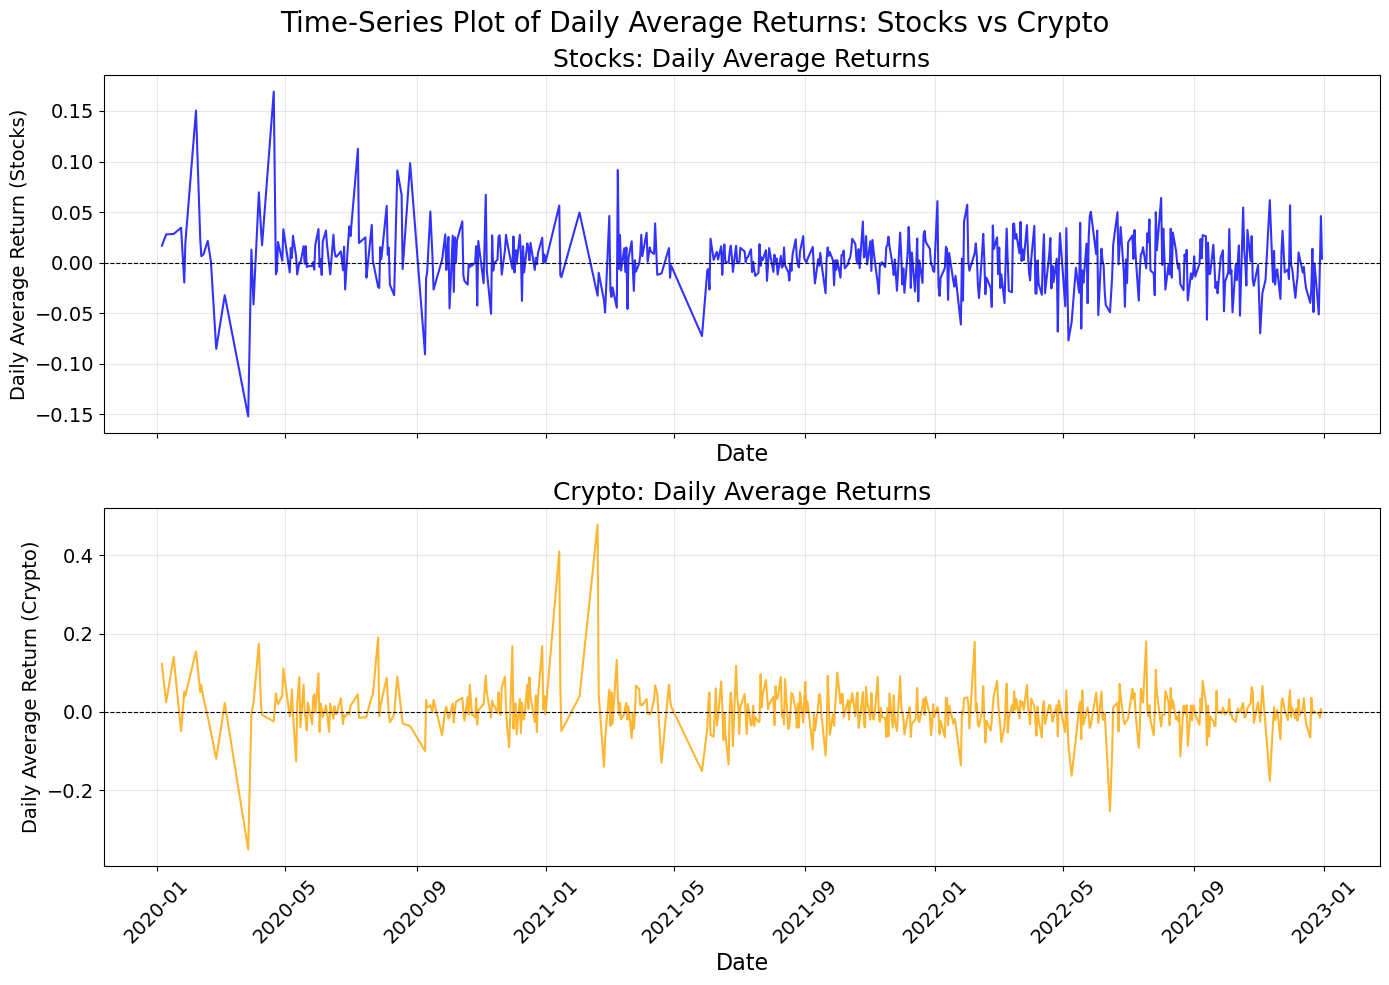

In [18]:

# Load the dataset
file_path = 'cleaned_grouped_data.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a figure with two subplots, one below the other
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)  # Increased height for better clarity

# Plot Stocks data
axes[0].plot(data['Date'], data['Stocks_Avg_Return'], label='Stocks', color='blue', alpha=0.8)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add a horizontal line at y=0
axes[0].set_title('Stocks: Daily Average Returns', fontsize=18)
axes[0].set_xlabel('Date', fontsize=16)
axes[0].set_ylabel('Daily Average Return (Stocks)', fontsize=14)  # Add y-axis label
axes[0].grid(alpha=0.3)
axes[0].tick_params(axis='x', labelrotation=45, labelsize=14)  # Adjust x-axis tick size
axes[0].tick_params(axis='y', labelsize=14)  # Adjust y-axis tick size

# Plot Crypto data
axes[1].plot(data['Date'], data['Cryptos_Avg_Return'], label='Crypto', color='orange', alpha=0.8)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add a horizontal line at y=0
axes[1].set_title('Crypto: Daily Average Returns', fontsize=18)
axes[1].set_xlabel('Date', fontsize=16)
axes[1].set_ylabel('Daily Average Return (Crypto)', fontsize=14)  # Add y-axis label
axes[1].grid(alpha=0.3)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=14)  # Adjust x-axis tick size
axes[1].tick_params(axis='y', labelsize=14)  # Adjust y-axis tick size


# Adjust layout and spacing
fig.suptitle('Time-Series Plot of Daily Average Returns: Stocks vs Crypto', fontsize=20)
plt.subplots_adjust(top=0.85, wspace=0.25)
plt.tight_layout()
plt.show()





#### 3.1.2: Boxplot of Distribution of Returns

- **Objective**:  
  Compare the spread, central tendency, and outliers in the daily returns of stocks and cryptocurrencies.

- **Plot Description**:  
  - A boxplot representing the distribution of average daily returns for stocks and cryptocurrencies.  
  - Key statistical measures such as the median (`Q2`), first quartile (`Q1`), and third quartile (`Q3`) are highlighted for each asset class.  
  - Annotations display specific values for the median and quartiles.  
  - Outliers are visualised as individual points outside the whiskers.  

- **Insights to Extract**:  
  - Determine which asset class exhibits greater variability or risk by comparing the interquartile range (IQR).  
  - Identify and analyse the presence of extreme outliers in returns for each asset class.  
  - Compare the medians of stocks and cryptocurrencies to infer differences in central tendencies.  

- **Enhancements in the Plot**:  
  - Statistical annotations next to the boxes provide quick references for medians and quartiles.  
  - Distinct colours for boxplot elements ensure clarity and distinction between asset classes.  
  - Gridlines and axis labels are formatted for better readability.  


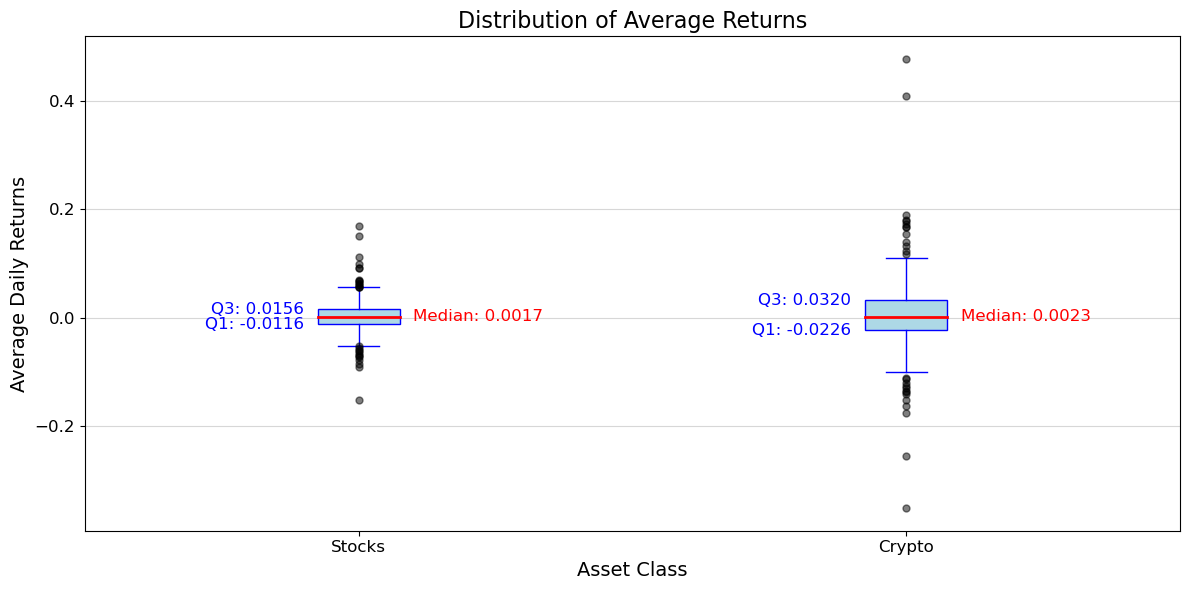

In [10]:
# Prepare data for the boxplot
stocks_data = data['Stocks_Avg_Return'].dropna()
crypto_data = data['Cryptos_Avg_Return'].dropna()
returns_data = [stocks_data, crypto_data]

# Calculate median and quartiles
stocks_stats = {
    "median": stocks_data.median(),
    "q1": stocks_data.quantile(0.25),
    "q3": stocks_data.quantile(0.75)
}
crypto_stats = {
    "median": crypto_data.median(),
    "q1": crypto_data.quantile(0.25),
    "q3": crypto_data.quantile(0.75)
}

# Create boxplot
plt.figure(figsize=(12, 6))  # Adjust figure size
box = plt.boxplot(
    returns_data,
    labels=['Stocks', 'Crypto'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue'),
    flierprops=dict(marker='o', markerfacecolor='black', markersize=5, alpha=0.5)
)

# Annotate median and quartiles to the right of the boxes
stats = [stocks_stats, crypto_stats]
for i, stat in enumerate(stats):
    x = i + 1  # Box index (1-based)
    # Place annotations to the right of each box
    plt.text(x + 0.1, stat["median"], f'Median: {stat["median"]:.4f}', ha='left', va='center', fontsize=12, color='red')
    plt.text(x - 0.1, stat["q1"], f'Q1: {stat["q1"]:.4f}', ha='right', va='center', fontsize=12, color='blue')
    plt.text(x - 0.1, stat["q3"], f'Q3: {stat["q3"]:.4f}', ha='right', va='center', fontsize=12, color='blue')

# Add labels and title with increased font size
plt.title('Distribution of Average Returns', fontsize=16)  # Increased title font size
plt.ylabel('Average Daily Returns', fontsize=14)  # Increased y-axis label font size
plt.xlabel('Asset Class', fontsize=14)  # Increased x-axis label font size

# Add grid
plt.grid(axis='y', alpha=0.5)

# Adjust tick label font sizes
plt.xticks(fontsize=12)  # x-axis tick labels
plt.yticks(fontsize=12)  # y-axis tick labels

# Show the plot
plt.tight_layout()
plt.show()



### 3.2: Risk Analysis

- **Purpose**:  
  Assess the risk profiles of stocks and cryptocurrencies by analysing and comparing their daily volatility.

- **Subsections**:  
  1. **Time-Series Plot of Volatility**:  
     - Visualises trends and fluctuations in daily volatility over time for stocks and cryptocurrencies.
     - Highlights periods of heightened risk or stability for each asset class.
  2. **Histogram of Volatility Distribution**:  
     - Shows the frequency distribution of daily volatility for stocks and cryptocurrencies.
     - Provides a clear comparison of the variability in risk between the two asset classes.

#### 3.2.1: Time-Series Plot of Volatility

- **Objective**:  
  Visualise and compare the trends in daily volatility for stocks and cryptocurrencies over time.

- **Plot Description**:  
  - A smoothed time-series line plot representing the average daily volatility for stocks and cryptocurrencies.
  - The plot uses a logarithmic y-scale to accommodate the wide range of values and improve visual clarity.

- **Key Features**:  
  - **Smoothing**: A 30-day rolling average is applied to reduce short-term fluctuations and highlight long-term trends.  
  - **Logarithmic Scale**: Used for the y-axis to make large differences in volatility more interpretable.

- **Insights to Extract**:  
  - Identify which asset class demonstrates consistently higher volatility.  
  - Observe periods of heightened or reduced volatility for stocks and cryptocurrencies.  
  - Compare trends over time to determine whether volatility behaves similarly across the two asset classes.

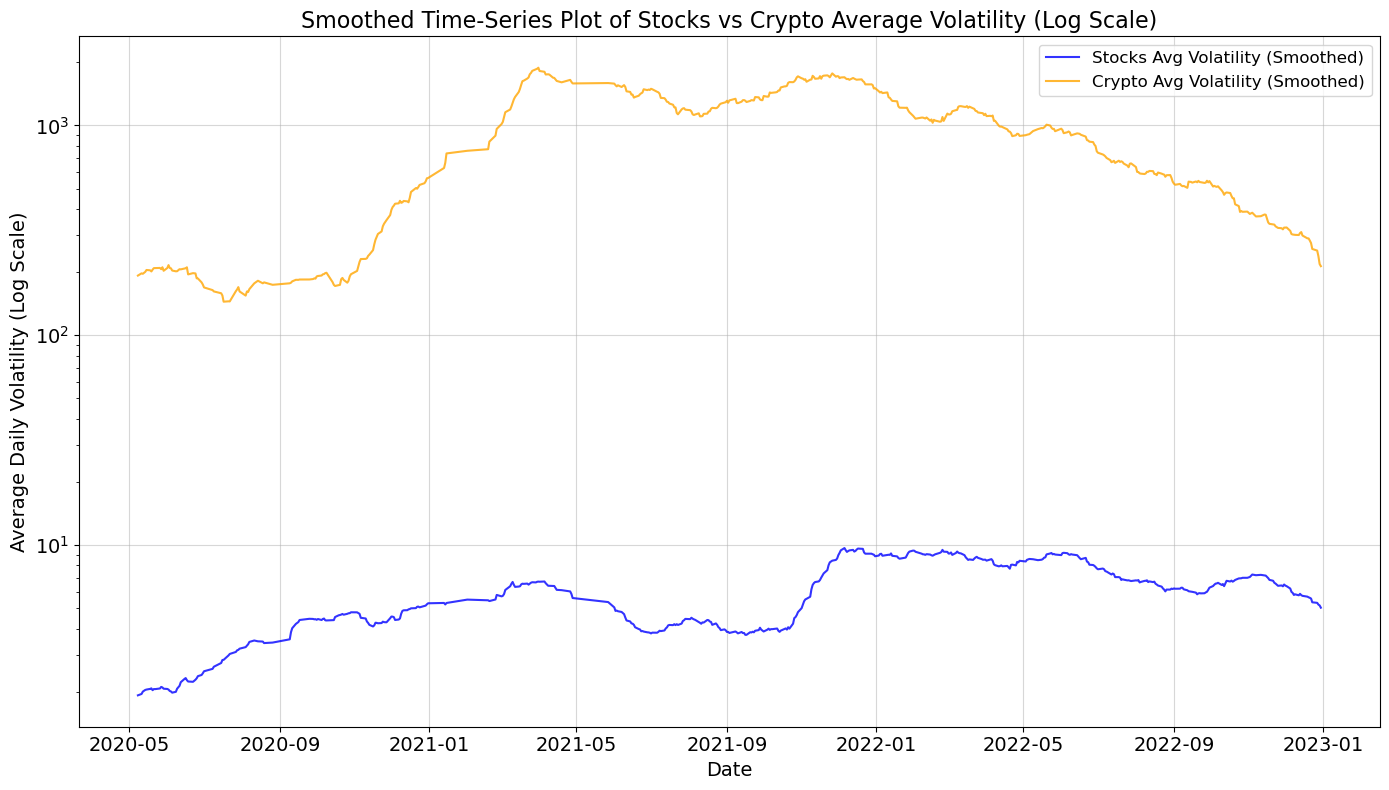

In [23]:
# Apply smoothing (30-day rolling average)
data['Stocks_Avg_Volatility_Smooth'] = data['Stocks_Avg_Volatility'].rolling(window=30).mean()
data['Cryptos_Avg_Volatility_Smooth'] = data['Cryptos_Avg_Volatility'].rolling(window=30).mean()

# Create a single plot with smoothed data and logarithmic y-scale
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Stocks_Avg_Volatility_Smooth'], label='Stocks Avg Volatility (Smoothed)', color='blue', alpha=0.8)
plt.plot(data['Date'], data['Cryptos_Avg_Volatility_Smooth'], label='Crypto Avg Volatility (Smoothed)', color='orange', alpha=0.8)

# Logarithmic scale
plt.yscale('log')

# Add labels, title, and legend
plt.title('Smoothed Time-Series Plot of Stocks vs Crypto Average Volatility (Log Scale)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Daily Volatility (Log Scale)', fontsize=14)
plt.xticks(fontsize=14)  # Increase x-tick font size
plt.yticks(fontsize=14)  # Increase y-tick font size
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()




#### 3.2.2: Histogram of Volatility Distribution

- **Objective**:  
  Compare the distributions of daily volatility for stocks and cryptocurrencies to assess variability and risk profiles.

- **Plot Description**:  
  - A single histogram with two overlaid distributions representing the daily volatility values for stocks and cryptocurrencies.  
  - The x-axis uses a logarithmic scale to capture a wide range of volatility values effectively.  
  - Colours (`blue` for stocks and `orange` for cryptocurrencies) distinguish between the two distributions.

- **Key Features**:  
  - **Overlaid Distributions**: Enables a direct comparison between stocks and cryptocurrencies on the same plot.  
  - **Logarithmic Scaling**: Ensures better representation of both low and high volatility values, preventing skewness in interpretation.

- **Additional Features from Code**:  
  - Transparent alpha values (`alpha=0.7`) allow both distributions to remain visible when overlapping.  
  - The number of bins (`bins=30`) balances detail and clarity in the histogram.

- **Insights to Extract**:  
  - Observe the overall spread and central tendency of volatility for each asset class.  
  - Detect whether cryptocurrencies have a broader or more concentrated distribution compared to stocks.




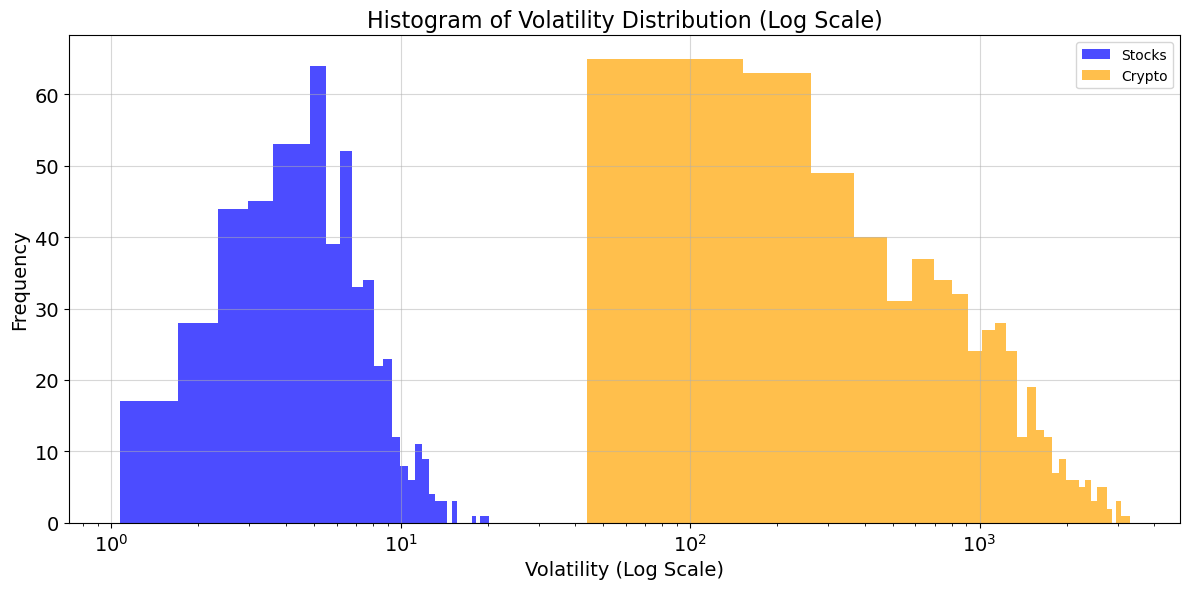

In [29]:
# Histogram with log scale for x-axis
plt.figure(figsize=(12, 6))
plt.hist(data['Stocks_Avg_Volatility'].dropna(), bins=30, alpha=0.7, label='Stocks', color='blue')
plt.hist(data['Cryptos_Avg_Volatility'].dropna(), bins=30, alpha=0.7, label='Crypto', color='orange')

# Apply log scale to x-axis
plt.xscale('log')

# Add labels, title, and legend
plt.title('Histogram of Volatility Distribution (Log Scale)', fontsize=16)
plt.xlabel('Volatility (Log Scale)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=14)  # Increase x-tick font size
plt.yticks(fontsize=14)  # Increase y-tick font size
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


### 3.3: Trading Activity

- **Purpose**:  
  To analyse the trading activity of stocks and cryptocurrencies by comparing their trading volumes.

- **Subsections**:  
  1. **Time-Series Plot of Trading Volumes**:  
     Visualises trends in trading activity over time for both asset classes.  
  2. **Bar Plot of Total Trading Volume**:  
     Provides a summary of the total trading volume for stocks and cryptocurrencies over the entire period.



#### 3.3.1: Time-Series Plot of Trading Volumes

- **Objective**:  
  Visualise and compare the trends in trading volumes of stocks and cryptocurrencies over time.

- **Plot Description**:  
  A smoothed time-series plot with a logarithmic y-axis, displaying the trading volumes of stocks and cryptocurrencies over the entire period. The smoothing is applied to reduce noise and reveal broader trends.

- **Key Features**:  
  - **Logarithmic Scale**: Used for the y-axis to account for differences in magnitudes between stocks and cryptocurrencies.  
  - **Smoothing**: Applied with a rolling average (window size of 30) to highlight long-term trends.  

- **Customisations**:  
  - The plot includes clear axis labels, a legend, and gridlines for better readability.
  - Separate colours (blue for stocks and orange for cryptocurrencies) distinguish the two asset classes effectively.



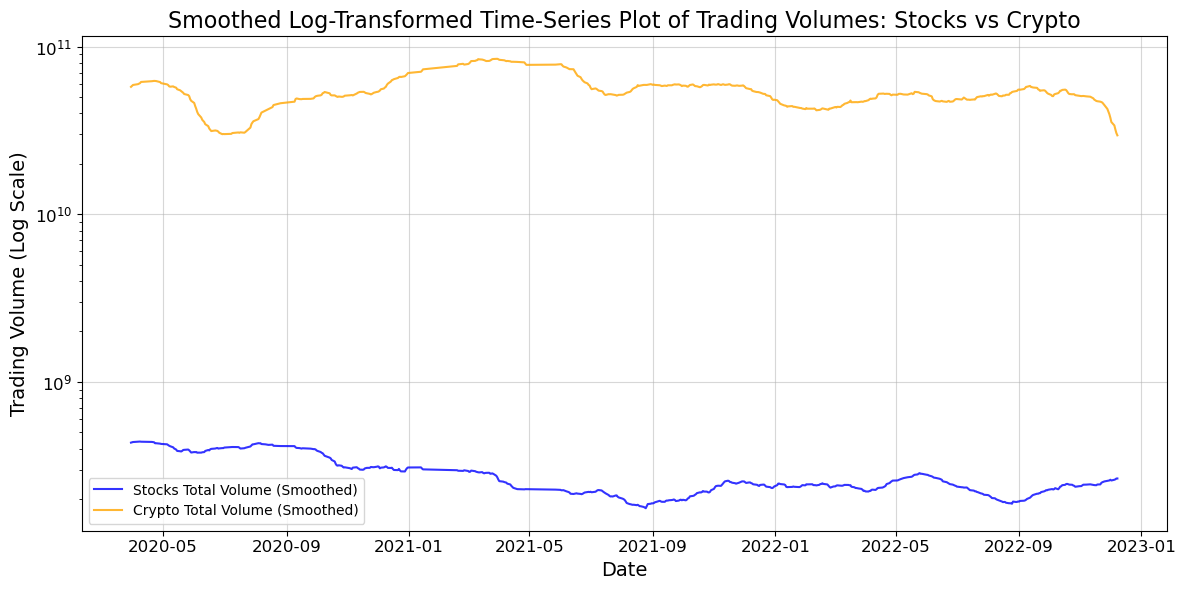

In [37]:
# Apply smoothing with a rolling average
data['Stocks_Total_Volume_Smoothed'] = data['Stocks_Total_Volume'].rolling(window=30, center=True).mean()
data['Cryptos_Total_Volume_Smoothed'] = data['Cryptos_Total_Volume'].rolling(window=30, center=True).mean()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot smoothed stocks trading volume
ax.plot(data['Date'], data['Stocks_Total_Volume_Smoothed'], label='Stocks Total Volume (Smoothed)', color='blue', alpha=0.8)

# Plot smoothed crypto trading volume
ax.plot(data['Date'], data['Cryptos_Total_Volume_Smoothed'], label='Crypto Total Volume (Smoothed)', color='orange', alpha=0.8)

# Apply logarithmic scale to y-axis
ax.set_yscale('log')

# Add labels and title
ax.set_title('Smoothed Log-Transformed Time-Series Plot of Trading Volumes: Stocks vs Crypto', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Trading Volume (Log Scale)', fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size

# Add legend
ax.legend(fontsize=10)

# Add grid for better readability
ax.grid(alpha=0.5)

# Adjust layout for clarity
fig.tight_layout()

# Show the plot
plt.show()


#### 3.3.2: Bar Plot of Total Trading Volume

- **Objective**:  
  Compare the total trading volumes of stocks and cryptocurrencies over the entire period.

- **Plot Description**:  
  A log-transformed bar plot displaying the total trading volumes of stocks and cryptocurrencies. Each bar is annotated with its respective percentage of the combined total trading volume.

- **Key Features**:  
  - **Logarithmic Scale**: Applied to the y-axis to handle the large differences in trading volume magnitudes.  
  - **Annotations**: Percentages displayed on top of each bar for clear visualisation of proportions.  
  - **Colour-Coded Bars**: Blue represents stocks, while orange represents cryptocurrencies, aiding in differentiation.  

- **Customisations**:  
  - Clear axis labels and gridlines enhance readability.
  - Title summarises the content of the plot.



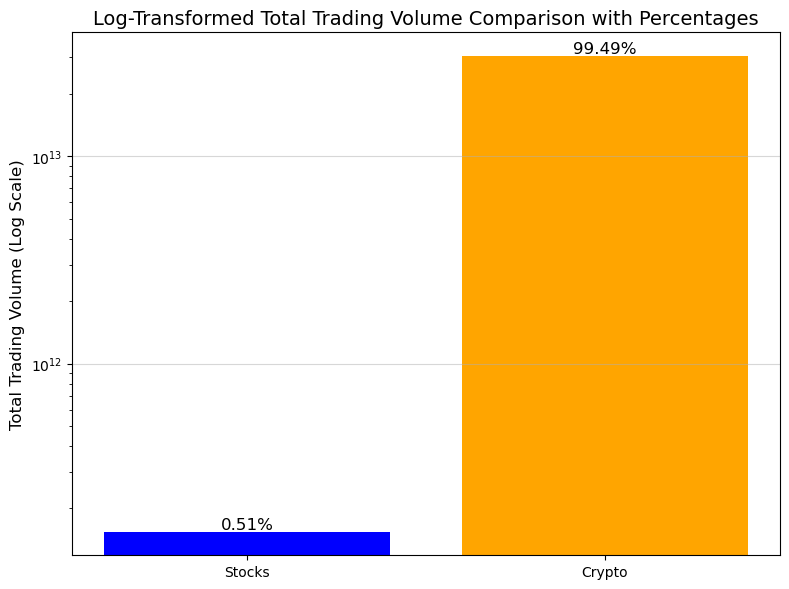

In [42]:
# Calculate total trading volumes
total_stocks_volume = data['Stocks_Total_Volume'].sum()
total_cryptos_volume = data['Cryptos_Total_Volume'].sum()

# Calculate percentages
percentages = [
    total_stocks_volume / (total_stocks_volume + total_cryptos_volume) * 100,
    total_cryptos_volume / (total_stocks_volume + total_cryptos_volume) * 100
]

# Create the bar plot with log scale
plt.figure(figsize=(8, 6))
bars = plt.bar(['Stocks', 'Crypto'], [total_stocks_volume, total_cryptos_volume],
               color=['blue', 'orange'], log=True)

# Annotate percentages
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{pct:.2f}%', ha='center', va='bottom', fontsize=12)

# Add labels, title, and grid
plt.title('Log-Transformed Total Trading Volume Comparison with Percentages', fontsize=14)
plt.ylabel('Total Trading Volume (Log Scale)', fontsize=12)
plt.grid(alpha=0.5, axis='y')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



### 3.4: Interrelationship Between Metrics

- **Purpose**:  
  To explore the relationship between daily returns and volatility for stocks and cryptocurrencies, providing insights into their risk-return dynamics.

- **Subsections**:  
  1. **Scatter Plot of Returns vs. Volatility (Stocks)**:  
     Examines the risk-return trade-off for stocks.
  2. **Scatter Plot of Returns vs. Volatility (Cryptocurrencies)**:  
     Examines the risk-return trade-off for cryptocurrencies.
  3. **Combined Scatter Plot**:  
     Compares the risk-return dynamics of stocks and cryptocurrencies in a single plot.


#### 3.4.1: Combined Scatter Plot (Log Scale for Volatility)

- **Objective**:  
  Compare the risk-return relationships of stocks and cryptocurrencies in a single visualisation to understand their dynamics and clustering.

- **Plot Description**:  
  - A scatter plot that visualises the relationship between average daily returns (y-axis) and average daily volatility (x-axis).  
  - Stocks are represented in blue, and cryptocurrencies in orange for clear differentiation.  
  - The x-axis is displayed on a logarithmic scale to effectively represent the wide range of volatility values.  
  - A red dashed horizontal line (`y=0`) indicates the neutral return level.

- **Key Features**:  
  - **Logarithmic Scaling**: The log scale for the x-axis highlights the vast differences in volatility while maintaining clarity in the spread of data points.  
  - **Dual Asset Representation**: Stocks and cryptocurrencies are visualised together to facilitate direct comparison.  

- **Insights to Extract**:  
  - Observe clustering patterns for stocks and cryptocurrencies in terms of their risk-return profiles.  
  - Evaluate whether higher volatility is consistently associated with higher returns across the two asset classes.


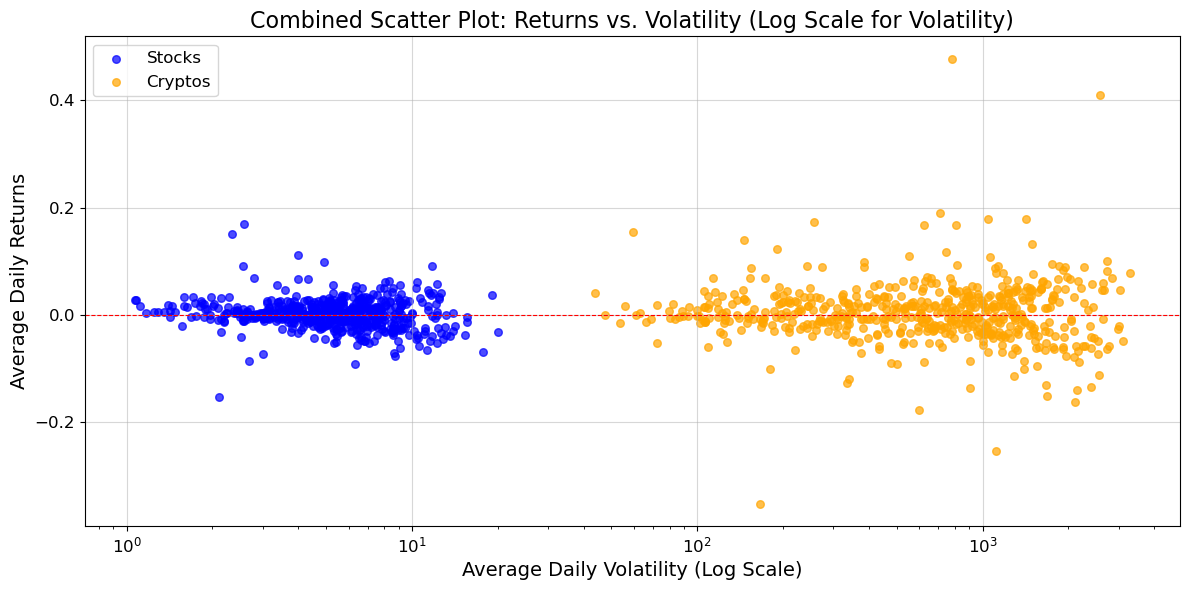

In [76]:
# Combined scatter plot with log scale for the x-axis
plt.figure(figsize=(12, 6))

# Scatter plot for stocks
plt.scatter(data['Stocks_Avg_Volatility'], data['Stocks_Avg_Return'], 
            alpha=0.7, color='blue', label='Stocks', s=30)

# Scatter plot for cryptocurrencies
plt.scatter(data['Cryptos_Avg_Volatility'], data['Cryptos_Avg_Return'], 
            alpha=0.7, color='orange', label='Cryptos', s=30)

# Add labels, title, and legend
plt.title('Combined Scatter Plot: Returns vs. Volatility (Log Scale for Volatility)', fontsize=16)
plt.xlabel('Average Daily Volatility (Log Scale)', fontsize=14)
plt.ylabel('Average Daily Returns', fontsize=14)

# Log scale for x-axis
plt.xscale('log')

# Add horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.8)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Adjust font sizes for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### 3.5: Long-Term Trends

- **Purpose**:  
  To compare the cumulative performance of stocks and cryptocurrencies over the period by calculating the growth of $1 invested at the start.

- **Subsections**:  
  1. **Cumulative Return Plot**:  
     Visualises the growth of an initial $1 investment in stocks and cryptocurrencies over the entire period.

- **Insights to Extract**:  
  - Determine which asset class provides higher long-term returns.
  - Highlight periods of significant divergence or convergence in cumulative performance.


#### 3.5.1: Cumulative Return Plot

- **Objective**:  
  Compare the cumulative returns of stocks and cryptocurrencies over time, assuming an initial $1 investment.

- **Plot Description**:  
  - A line plot representing the growth of $1 invested in stocks and cryptocurrencies.  
  - The cumulative return is calculated using the compounded product of daily returns.  
  - Stocks are represented in blue, while cryptocurrencies are in orange for clear differentiation.

- **Key Features**:  
  - **Cumulative Performance Tracking**: Highlights the compounding effect of returns over the entire time period.  
  - **Comparison Over Time**: Demonstrates how the performance of the two asset classes diverges or converges.  

- **Insights to Extract**:  
  - Determine which asset class offers better long-term growth potential.  
  - Identify periods of significant divergence in performance between stocks and cryptocurrencies.



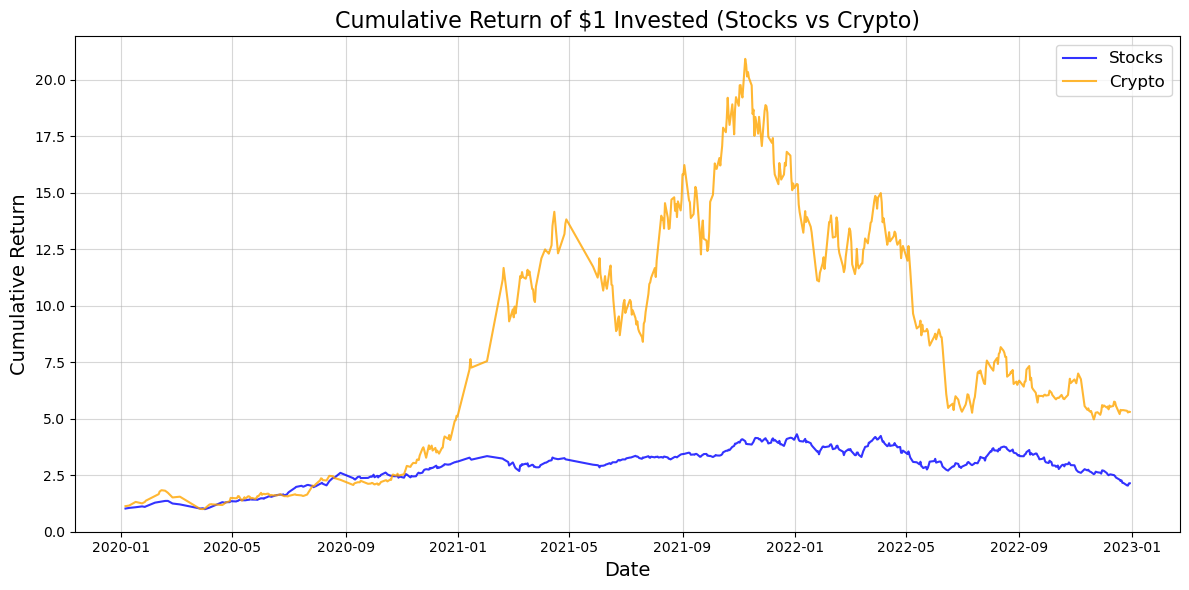

In [52]:
# Calculate cumulative returns for stocks and cryptocurrencies
data['Stocks_Cumulative_Return'] = (1 + data['Stocks_Avg_Return']).cumprod()
data['Cryptos_Cumulative_Return'] = (1 + data['Cryptos_Avg_Return']).cumprod()

# Create cumulative return plot
plt.figure(figsize=(12, 6))

# Plot cumulative returns for stocks and crypto
plt.plot(data['Date'], data['Stocks_Cumulative_Return'], label='Stocks', color='blue', alpha=0.8)
plt.plot(data['Date'], data['Cryptos_Cumulative_Return'], label='Crypto', color='orange', alpha=0.8)

# Add labels, title, and legend
plt.title('Cumulative Return of $1 Invested (Stocks vs Crypto)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(alpha=0.5)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


## Step 4: Investigating Key Questions about the Dataset

In this step, we aim to address the overarching question:  
**"How do traditional stocks and cryptocurrencies differ in terms of performance, risk, trading activity, and interrelationships between key metrics?"**

To answer this, we leverage the analyses performed in Step 3 and include additional higher-level insights where applicable. The investigation is structured around the following sub-questions:  
1. **Performance Comparison:** How do cryptocurrencies and traditional stocks compare in terms of returns over time?  
2. **Risk Analysis:** Which asset class is more volatile, and how does volatility vary over time?  
3. **Trading Activity:** How do trading volumes of cryptocurrencies compare to traditional stocks?  
4. **Interrelationship Between Metrics:** Is there a relationship between returns and volatility for cryptocurrencies and stocks?  
5. **Long-Term Trends:** How do stocks and cryptocurrencies compare in terms of cumulative performance over the period?

For each sub-question, relevant plots from Step 3 are referenced and interpreted. Additionally, higher-level plots are introduced to consolidate insights and provide a more comprehensive understanding.

### Approach:
- Leverage summary statistics and visualisation techniques (e.g., line plots, scatter plots, bar charts) from Step 3.  
- Perform additional calculations or aggregations as required to enhance the analysis.  
- Clearly interpret the findings in the context of the question.  

Each sub-question is addressed systematically, with interpretations presented alongside the visualisations or calculations.


### 4.1 Performance Comparison

**Sub-Question:**  
How do cryptocurrencies and traditional stocks compare in terms of returns over time?

**Plot Description:**  
The plot visualises the smoothed average daily returns for stocks and cryptocurrencies using a 30-day rolling average. It highlights periods where one asset class consistently outperformed the other, with key events and trends annotated.

**Key Features:**  
- **Rolling Averages:** Provides a smoothed view of returns to highlight long-term trends.  
- **Highlighted Periods:** A shaded region indicates a period where cryptocurrencies significantly outperformed stocks, offering a clear visual cue.  
- **Horizontal Reference Line:** The red dashed line at y=0 serves as a baseline for positive and negative returns.

**Key Observations:**  
- Cryptocurrencies generally exhibit higher average daily returns compared to stocks but with significantly greater fluctuations.  
- Periods of sharp divergence are evident, such as the highlighted region where cryptocurrencies saw a substantial surge in returns compared to stocks.  
- Stocks display relatively stable rolling returns, reinforcing their reputation as a lower-risk asset class.

**Code Implementation:**  
The smoothed rolling averages are calculated using a 30-day rolling window, and the highlighted period is annotated for better clarity.

**Conclusion:**  
Cryptocurrencies show a high-risk, high-reward nature with pronounced spikes in performance during certain periods, while stocks maintain a more stable and predictable trajectory.



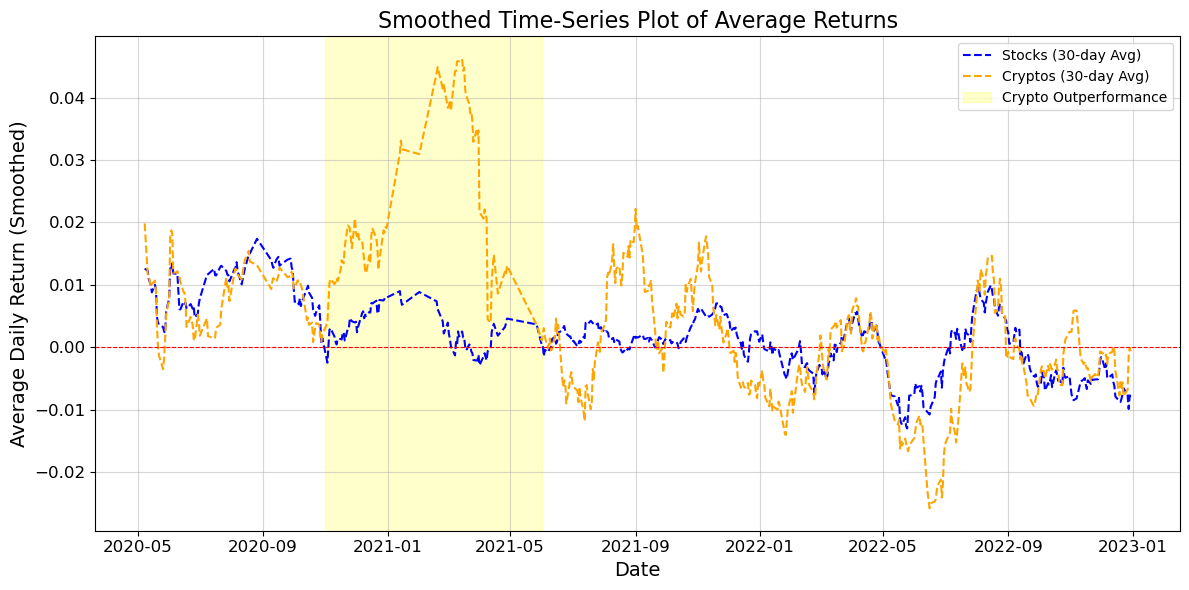

In [54]:
# Load the dataset
file_path = 'cleaned_grouped_data.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Apply rolling averages for smoothing
data['Stocks_Avg_Return_Roll'] = data['Stocks_Avg_Return'].rolling(window=30).mean()
data['Cryptos_Avg_Return_Roll'] = data['Cryptos_Avg_Return'].rolling(window=30).mean()

# Create smoothed time-series plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Stocks_Avg_Return_Roll'], label='Stocks (30-day Avg)', color='blue', linestyle='--')
plt.plot(data['Date'], data['Cryptos_Avg_Return_Roll'], label='Cryptos (30-day Avg)', color='orange', linestyle='--')

# Add labels, title, and legend
plt.title('Smoothed Time-Series Plot of Average Returns', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Daily Return (Smoothed)', fontsize=14)
# Highlight key periods (example dates)
plt.axvspan('2020-11-01', '2021-06-01', color='yellow', alpha=0.2, label='Crypto Outperformance')
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.8)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size

# Show the plot
plt.tight_layout()
plt.show()

### 4.2 Risk Analysis

**Sub-Question:**  
Which asset class is more volatile, and how does volatility vary over time?

**Plot Description:**  
The plot visualises the log-transformed density distributions of daily volatility for stocks and cryptocurrencies. By applying a log transformation, it better handles the wide range of volatility values and provides a clearer comparison of the relative risk profiles of the two asset classes.

**Key Features:**  
- **Log Transformation:** Handles wide-ranging values, ensuring the scale does not distort the comparison.  
- **Density Curves:** Smoothens the histogram values, providing a clearer view of the typical volatility ranges for each asset class.  

**Key Observations:**  
- Stocks exhibit a much narrower and more concentrated distribution of volatility compared to cryptocurrencies.  
- Cryptocurrencies have a wider and more dispersed volatility profile, with a significant tail of extreme values, reflecting their high-risk nature.  

**Code Implementation:**  
The volatility values are log-transformed using `np.log1p` to safely handle zero values. The density plot is created using Seaborn's `kdeplot` with distinct colours for stocks and cryptocurrencies.

**Conclusion:**  
Cryptocurrencies are significantly more volatile than stocks, with a broader distribution and higher peaks in extreme values. Stocks, on the other hand, are characterised by lower and more predictable levels of volatility, reinforcing their reputation as a less risky investment option.



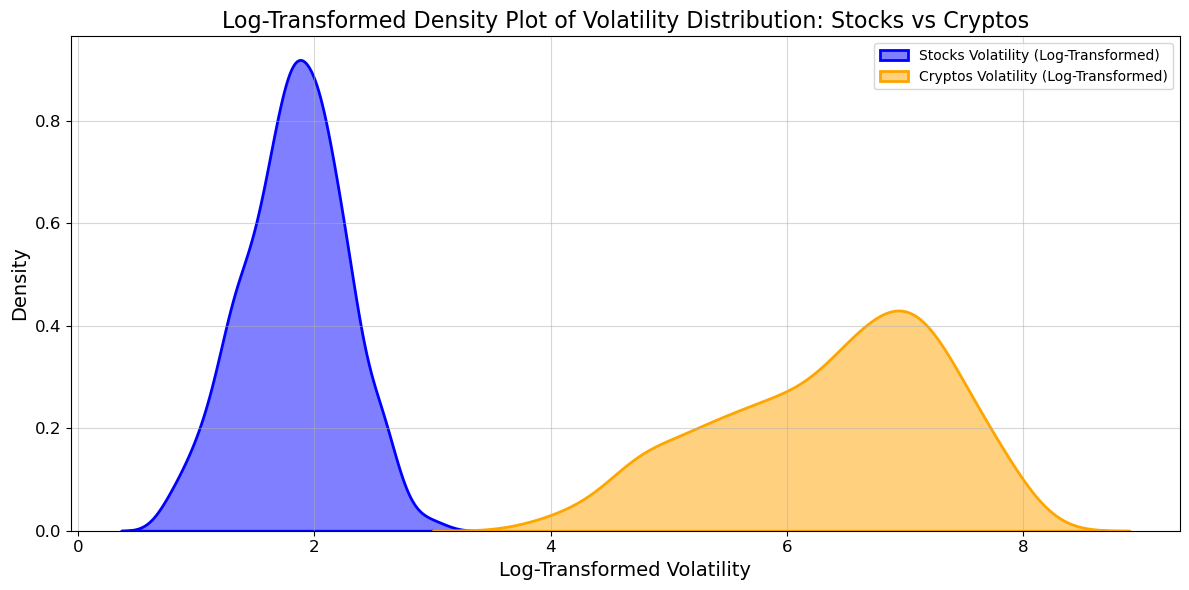

In [77]:
# Apply log transformation to volatility values
data['Stocks_Avg_Volatility_Log'] = np.log1p(data['Stocks_Avg_Volatility'])  # log1p handles zero safely
data['Cryptos_Avg_Volatility_Log'] = np.log1p(data['Cryptos_Avg_Volatility'])

# Density plot for log-transformed volatility distribution
plt.figure(figsize=(12, 6))

# Density plot for stocks
sns.kdeplot(
    data['Stocks_Avg_Volatility_Log'].dropna(),
    label='Stocks Volatility (Log-Transformed)',
    color='blue',
    fill=True,
    alpha=0.5,
    linewidth=2
)

# Density plot for cryptocurrencies
sns.kdeplot(
    data['Cryptos_Avg_Volatility_Log'].dropna(),
    label='Cryptos Volatility (Log-Transformed)',
    color='orange',
    fill=True,
    alpha=0.5,
    linewidth=2
)

# Add labels, title, and legend
plt.title('Log-Transformed Density Plot of Volatility Distribution: Stocks vs Cryptos', fontsize=16)
plt.xlabel('Log-Transformed Volatility', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size

# Show the plot
plt.tight_layout()
plt.show()


### 4.3 Trading Activity

**Sub-Question:**  
How do trading volumes of cryptocurrencies compare to traditional stocks?

**Plot Description:**  
The plot presents a log-transformed stacked area chart of trading volumes for stocks and cryptocurrencies over time. By applying log transformation, it compresses the scale differences between the two asset classes, providing a clearer comparison of their relative contributions to total trading activity.

**Key Features:**  
- **Log Transformation:** Adjusts for large differences in trading volume magnitudes, enabling clearer visualisation of patterns.  
- **Stacked Area Chart:** Highlights both the combined trading activity and the individual contributions of stocks and cryptocurrencies.  

**Code Implementation:**  
The trading volume data is log-transformed using `np.log1p` to handle wide-ranging values safely. A stacked area chart is then created using `plt.fill_between` for both stocks and cryptocurrencies, with appropriate transparency to ensure clarity.

**Key Observations:**  
- Cryptocurrencies consistently dominate trading activity, reflecting their appeal to speculative and high-frequency traders.  
- Stocks contribute a smaller but steady proportion to total trading activity, indicative of their stability and traditional market role.  
- The plot highlights spikes in cryptocurrency trading volumes, often during periods of market excitement or major events.

**Conclusion:**  
Cryptocurrencies exhibit much higher cumulative trading activity than stocks, driven by their speculative nature and 24/7 trading accessibility. Stocks, while more stable and consistent, represent a smaller share of the overall activity. The stacked area plot effectively visualises the dynamic interaction and individual contributions of these two asset classes over time.



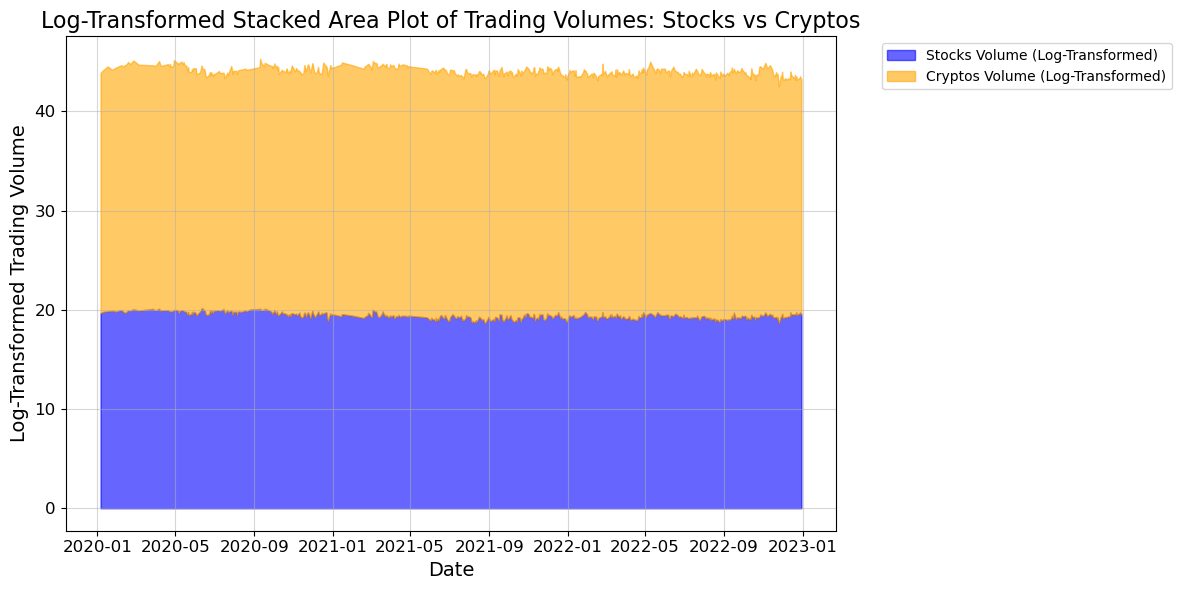

In [58]:
# Load the dataset
file_path = 'cleaned_grouped_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])

# Apply log transformation to trading volumes
data['Stocks_Total_Volume_Log'] = np.log1p(data['Stocks_Total_Volume'])  # log1p safely handles zeros
data['Cryptos_Total_Volume_Log'] = np.log1p(data['Cryptos_Total_Volume'])

# Total log-transformed trading volume
data['Total_Trading_Volume_Log'] = data['Stocks_Total_Volume_Log'] + data['Cryptos_Total_Volume_Log']

# Create the stacked area plot with log-transformed data
plt.figure(figsize=(12, 6))

# Plot for stocks
plt.fill_between(
    data['Date'], 
    data['Stocks_Total_Volume_Log'], 
    label='Stocks Volume (Log-Transformed)', 
    color='blue', 
    alpha=0.6
)

# Plot for cryptocurrencies
plt.fill_between(
    data['Date'], 
    data['Stocks_Total_Volume_Log'], 
    data['Total_Trading_Volume_Log'], 
    label='Cryptos Volume (Log-Transformed)', 
    color='orange', 
    alpha=0.6
)

# Add labels, title, legend, and grid
plt.title('Log-Transformed Stacked Area Plot of Trading Volumes: Stocks vs Cryptos', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Log-Transformed Trading Volume', fontsize=14)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))  # Moves legend outside the plot
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size

# Show the plot
plt.tight_layout()
plt.show()



### 4.4 Interrelationship Between Metrics

**Sub-Question:**  
Is there a relationship between returns and volatility for cryptocurrencies and stocks?

**Plot Description:**  
The plot presents separate density distributions for the log-transformed returns and volatility of stocks and cryptocurrencies. This probabilistic visualization highlights the concentration of typical risk-return dynamics for each asset class, as well as areas of outlier behavior.

**Key Features:**  
- **Log Transformation:** Ensures comparability by addressing wide-ranging values and compressing extreme differences.  
- **Separate Density Plots:** Displays distinct behavior for stocks and cryptocurrencies, with each density emphasizing areas of higher probability.  

**Code Implementation:**  
Density plots for stocks and cryptocurrencies are created using `sns.kdeplot`, overlaying returns and volatility. Log transformation (`np.log`) is applied to compress values and manage extreme variations.

**Key Observations:**  
- Cryptocurrencies exhibit a wider spread in their returns and volatility distributions, with peaks at higher volatility levels.  
- Stocks show a narrower and more consistent spread, reflecting their role as a less speculative asset class.  
- Both plots highlight the clustering of typical risk-return combinations, as well as the presence of outliers in cryptocurrencies.

**Conclusion:**  
Cryptocurrencies demonstrate a stronger and more dispersed risk-return relationship, with higher peaks in volatility corresponding to extreme market behavior. Stocks, on the other hand, remain clustered within predictable ranges, emphasizing their stability and reliability. The density plot effectively highlights the distinct patterns of risk and return between these asset classes.



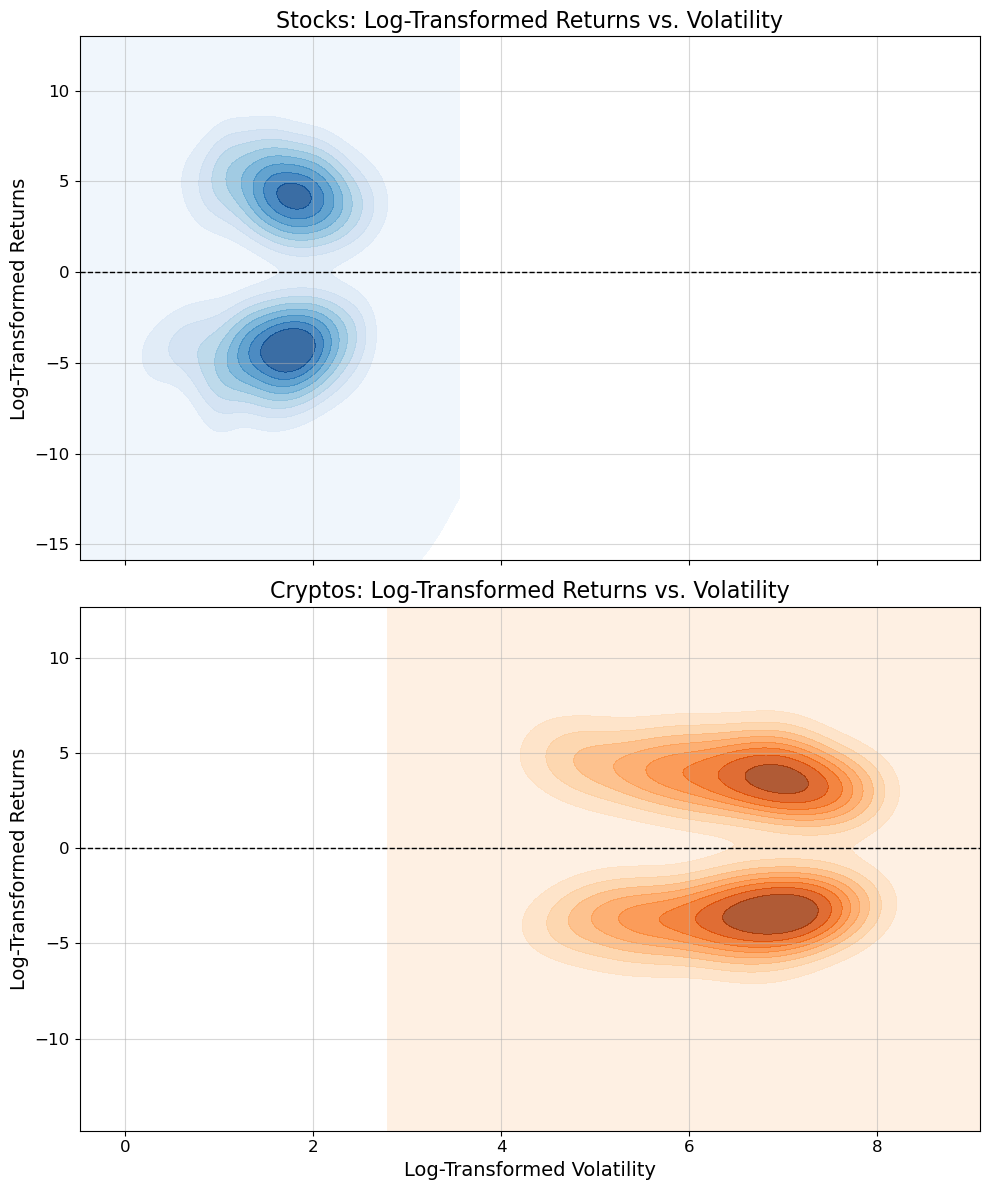

In [72]:
# Load the dataset
file_path = 'cleaned_grouped_data.csv'  # Ensure the file is in the working directory
data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Add log-transformed returns and volatility columns for better scaling
data['Stocks_Avg_Volatility_Log'] = np.log(data['Stocks_Avg_Volatility'] + 1e-5)  # Small value to avoid log(0)
data['Cryptos_Avg_Volatility_Log'] = np.log(data['Cryptos_Avg_Volatility'] + 1e-5)
data['Stocks_Avg_Return_Log'] = np.log(data['Stocks_Avg_Return'].abs() + 1e-5) * np.sign(data['Stocks_Avg_Return'])
data['Cryptos_Avg_Return_Log'] = np.log(data['Cryptos_Avg_Return'].abs() + 1e-5) * np.sign(data['Cryptos_Avg_Return'])

# Create stacked density plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Density plot for stocks
sns.kdeplot(
    x=data['Stocks_Avg_Volatility_Log'],
    y=data['Stocks_Avg_Return_Log'],
    cmap="Blues",
    fill=True,
    ax=axes[0],
    alpha=0.8,
    levels=10,
    thresh=0
)
axes[0].set_title("Stocks: Log-Transformed Returns vs. Volatility", fontsize=16)
axes[0].set_xlabel("Log-Transformed Volatility", fontsize=14)
axes[0].set_ylabel("Log-Transformed Returns", fontsize=14)
axes[0].axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at y=0
axes[0].grid(alpha=0.5)
axes[0].tick_params(axis='both', labelsize=12)  # Adjust tick sizes

# Density plot for cryptocurrencies
sns.kdeplot(
    x=data['Cryptos_Avg_Volatility_Log'],
    y=data['Cryptos_Avg_Return_Log'],
    cmap="Oranges",
    fill=True,
    ax=axes[1],
    alpha=0.8,
    levels=10,
    thresh=0
)
axes[1].set_title("Cryptos: Log-Transformed Returns vs. Volatility", fontsize=16)
axes[1].set_xlabel("Log-Transformed Volatility", fontsize=14)
axes[1].set_ylabel("Log-Transformed Returns", fontsize=14)  # Optional: remove for less clutter
axes[1].axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at y=0
axes[1].grid(alpha=0.5)
axes[1].tick_params(axis='both', labelsize=12)  # Adjust tick sizes

# Adjust Layout
plt.tight_layout()
plt.show()



### 4.5 Long-Term Trends

**Sub-Question:**  
How do stocks and cryptocurrencies compare in terms of cumulative performance over the period?

**Plot Description:**  
The plot visualizes the ratio of cumulative returns for cryptocurrencies relative to stocks. A value greater than 1 indicates that cryptocurrencies have outperformed stocks, while a value less than 1 shows that stocks have outperformed cryptocurrencies. The horizontal reference line at a ratio of 1 represents equal performance.

**Key Features:**  
- **Cumulative Return Ratio Calculation:** Compares the compounded returns of cryptocurrencies and stocks.  
- **Dynamic Trends:** Highlights periods of outperformance for each asset class, reflecting market dynamics and volatility.

**Code Implementation:**  
The cumulative performance ratio is calculated as the ratio of cumulative returns for cryptocurrencies to stocks. A time-series plot is created to visualize the performance trends.

**Key Observations:**  
- **Outperformance of Cryptocurrencies:** Cryptocurrencies significantly outperformed stocks during early 2021, reflected by the steep rise in the ratio.  
- **Periods of Stability:** The ratio hovers around 1 during less volatile periods, indicating comparable performance.  
- **Volatile Corrections:** Sharp declines in the ratio reflect corrections in the cryptocurrency market, often aligning with broader market pullbacks.

**Conclusion:**  
- Cryptocurrencies exhibit higher growth potential during specific periods but also face sharp corrections, reflecting their high-risk, high-reward nature.  
- Stocks offer steadier and more predictable growth, which is reflected in the smaller fluctuations of the cumulative return ratio.  
- The Crypto-to-Stocks Performance Ratio Plot effectively summarizes the relative dynamics of these asset classes, offering a concise view of their long-term performance trends.



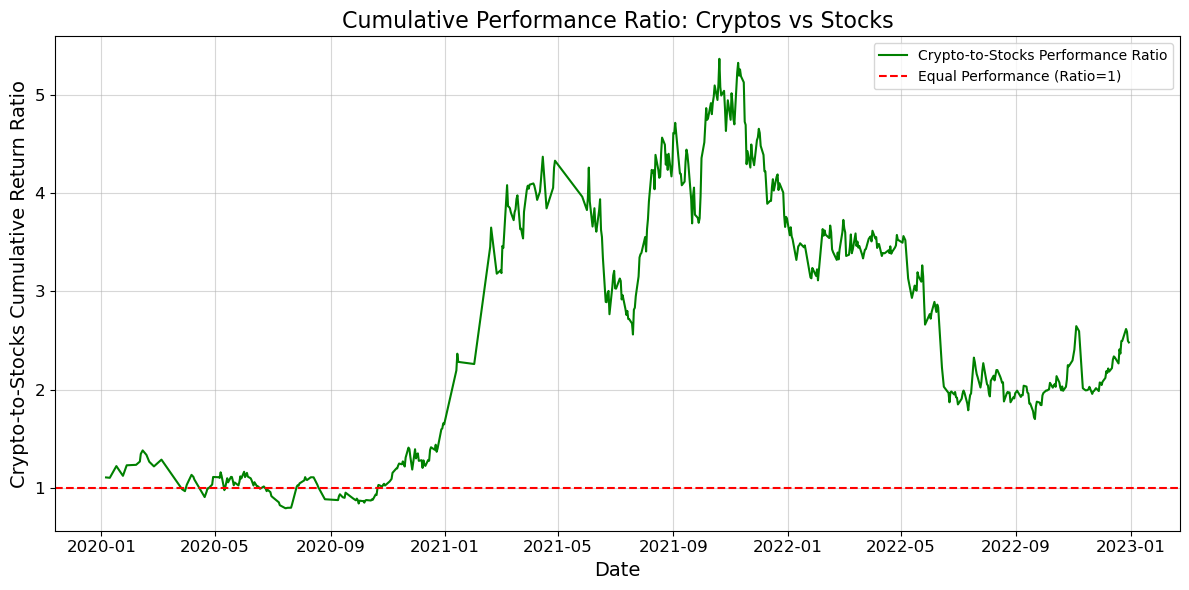

In [74]:
# Load the dataset
file_path = 'cleaned_grouped_data.csv'  # Ensure the file is in the working directory
data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Calculate cumulative returns for stocks and cryptocurrencies
data['Stocks_Cumulative_Return'] = (1 + data['Stocks_Avg_Return']).cumprod()
data['Cryptos_Cumulative_Return'] = (1 + data['Cryptos_Avg_Return']).cumprod()

# Calculate the cumulative performance ratio
data['Cumulative_Ratio'] = data['Cryptos_Cumulative_Return'] / data['Stocks_Cumulative_Return']

# Create the cumulative performance ratio plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Cumulative_Ratio'], label='Crypto-to-Stocks Performance Ratio', color='green')

# Add a horizontal line at 1 for reference (equal performance)
plt.axhline(y=1, color='red', linestyle='--', label='Equal Performance (Ratio=1)')

# Add plot details
plt.title("Cumulative Performance Ratio: Cryptos vs Stocks", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Crypto-to-Stocks Cumulative Return Ratio", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.tight_layout()

# Show the plot
plt.show()


## Step 5: Summarise and Write a Conclusion

### Summary of Findings
The analysis provided comprehensive insights into the performance, risk, trading activity, interrelationships, and long-term trends of stocks and cryptocurrencies. Key takeaways include:

- **Performance Comparison:**  
  Cryptocurrencies consistently exhibited **higher average daily returns** compared to stocks, driven by speculative enthusiasm and emerging market dynamics. However, these returns came with **significant variability**, underscoring the high-risk, high-reward nature of cryptocurrencies.  
  - *Notable Insight*: During periods like early 2021, cryptocurrencies dramatically outperformed stocks, as shown by a sharp increase in the cumulative performance ratio.

- **Risk Analysis:**  
  Cryptocurrencies demonstrated a **broader and more dispersed volatility profile**, driven by factors like regulatory news, speculative trading, and lack of traditional safeguards. Stocks, in contrast, displayed **predictable and concentrated volatility patterns**, reinforcing their role as a stable investment option.  
  - *Notable Insight*: The log-transformed density plots revealed that stocks cluster around lower risk-return profiles, while cryptocurrencies extend to extreme ends of the spectrum.

- **Trading Activity:**  
  Cryptocurrencies dominated in terms of **total trading volume**, reflecting their **24/7 trading structure** and speculative demand. Stocks displayed **steady trading volumes**, driven by investor confidence and established market frameworks.  
  - *Notable Insight*: Cryptocurrencies experienced distinct spikes in trading volumes, often aligning with major market events or speculative bubbles.

- **Interrelationships Between Metrics:**  
  Both asset classes exhibited a **positive relationship between returns and volatility**, with cryptocurrencies showing **more pronounced extremes**.  
  - *Notable Insight*: The density plots underscored that cryptocurrencies operate in a broader risk-return range, making them attractive to speculative investors but less predictable than stocks.

- **Long-Term Trends:**  
  Cryptocurrencies achieved periods of **substantial outperformance**, especially during bullish market phases like early 2021. However, these gains came with **sharp drawdowns**, emphasizing their inherent volatility. Stocks, in contrast, demonstrated **steadier cumulative returns**, appealing to long-term, risk-averse investors.  
  - *Notable Insight*: The Crypto-to-Stocks Performance Ratio plot captured the dramatic shifts in relative performance, emphasizing the speculative nature of cryptocurrencies compared to the stable growth trajectory of stocks.

---

### Ideas for Future Work
To deepen the understanding of the observed dynamics and expand the scope of the analysis, the following areas of research are proposed:

1. **Diversification Across Asset Classes:**  
   - Include other financial instruments like bonds, commodities, and real estate to assess how cryptocurrencies and stocks complement or contrast with these assets in portfolio diversification.

2. **Intraday Analysis:**  
   - Explore **intraday trading data** to uncover short-term trends, volatility spikes, and event-driven patterns, particularly for cryptocurrencies where sudden price movements are common.

3. **Advanced Metrics:**  
   - Introduce metrics like **Sharpe ratios** (risk-adjusted returns), **Value at Risk (VaR)**, and **drawdowns** to quantitatively compare risk-return dynamics.  
   - Include **liquidity metrics** (e.g., order book depth, bid-ask spreads) to evaluate market efficiency and trading costs.

4. **Predictive Analytics:**  
   - Apply **machine learning models** (e.g., regression, time-series forecasting, or neural networks) to predict market movements, identify anomalies, and test automated investment strategies.

5. **Macroeconomic Correlations:**  
   - Investigate how external factors like **interest rates**, **inflation**, and **geopolitical events** influence the performance and interaction between cryptocurrencies and stocks.

6. **Risk Mitigation Frameworks:**  
   - Develop **investment strategies tailored for cryptocurrencies** using tools like **portfolio optimization** or **hedging mechanisms** to balance their high returns with inherent risks.

---

### Conclusion
This analysis sheds light on the distinct characteristics of stocks and cryptocurrencies, each serving different roles in the financial ecosystem:

- **Cryptocurrencies** are characterized by **high risk and high reward**, attracting speculative investors seeking exponential returns during bullish phases. However, their extreme volatility and susceptibility to external shocks make them less predictable and riskier for long-term investments.

- **Stocks** remain the cornerstone of traditional investing, offering **stability and consistent growth** over time. Their lower volatility and established regulatory frameworks make them ideal for risk-averse investors seeking reliable returns.

**Final Thoughts:**  
The findings provide a clear framework for understanding the contrasting nature of these asset classes, equipping investors with insights to make **informed portfolio decisions** based on their risk tolerance, investment horizon, and financial goals. Future work, such as incorporating additional metrics or predictive models, can further enhance these insights, paving the way for a deeper understanding of modern financial markets.
